/tmp/ipykernel_23465/3462004670.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy, T_tn)


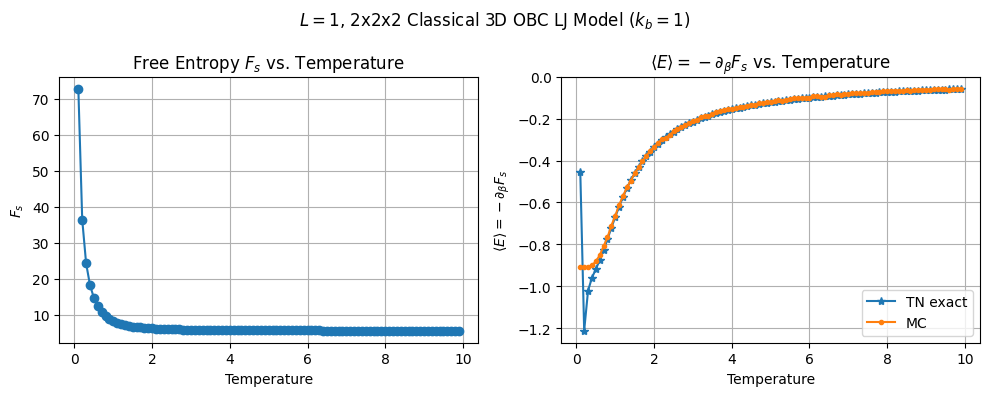

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 2
L = 1

# TN

# Read from file
f = open("./3DLJ_2_exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn = []
Entropy = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn.append(float(line_list[0].split('=')[1]))
    Entropy.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn = np.array(T_tn)
Entropy = np.array(Entropy)
dSdT = scipy.gradient(Entropy, T_tn)
T_sq = T_tn**2

numerical_E = T_sq * dSdT / N_a**3



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn, Entropy, 'o-', label='OBC')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')

ax[1].plot(T_tn, numerical_E, '*-', label='TN exact')
ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} Classical 3D OBC LJ Model ($k_b=1$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/2938529740.py:33: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy, T_tn)
/tmp/ipykernel_366/2938529740.py:58: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


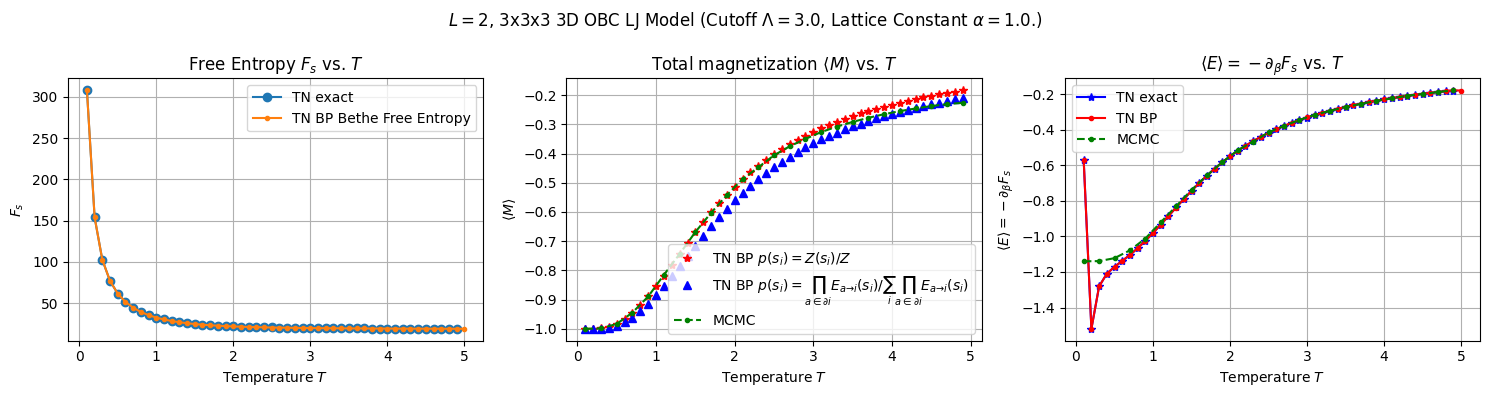

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 3
L = 2

cutoff = 3.0  # Cutoff distance for LJ potential
epsilon = 1.0  # Depth of the potential well/ Energy scale
sigma = 1.0  # Length scale in LJ potential, also the distance at which the potential becomes zero

# TN Exact

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn = []
Entropy = []
# M = []

for line in lines:
    line_list = line.split(',')
    T_tn.append(float(line_list[0].split('=')[1]))
    Entropy.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn = np.array(T_tn)
Entropy = np.array(Entropy)
dSdT = scipy.gradient(Entropy, T_tn)
T_sq = T_tn**2

numerical_E = T_sq * dSdT / N_a**3


# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP = []
Entropy_BP = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2

numerical_E_BP = T_sq * dSdT / N_a**3

# Magnetization
# Read from file
f = open(f"./Mag_3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()

T_mag_BP = []
M_BP = []
M_BP_from_messages = []

for line in lines:
    line_list = line.split('\n')
    if line_list[0] != '':
        T_mag_BP.append(float(line_list[0].split(',')[0].split('=')[1]))
        M_BP.append(float(line_list[0].split(',')[1].split('=')[1]))
        M_BP_from_messages.append(float(line_list[0].split(',')[2].split('=')[1]))
    



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))


# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(T_tn, Entropy, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.-', label='TN BP Bethe Free Entropy')
ax[0].set_xlabel(r'Temperature $T$')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. $T$')
ax[0].legend()

ax[2].plot(T_tn, numerical_E, '*-', label='TN exact',color='b')
ax[2].plot(T_tn_BP, numerical_E_BP, '.-', label='TN BP',color='r')
ax[2].plot(T, E, '.--', label='MCMC',color='g')
ax[2].set_xlabel(r'Temperature $T$')
ax[2].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[2].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. $T$')
ax[2].legend()

ax[1].set_xlabel(r'Temperature $T$')
ax[1].set_ylabel(r'$\langle M\rangle$')
ax[1].set_title(r'Total magnetization $\langle M\rangle$ vs. $T$')

# Plot the BP magnetization
ax[1].plot(T_mag_BP, M_BP, '*', color='r', label=r'TN BP $p(s_i)=Z(s_i)/Z$')
ax[1].plot(T_mag_BP, M_BP_from_messages, '^', color='b', label=r'TN BP $p(s_i)=\prod_{a \in \partial i} E_{a\to i}(s_i)/\sum_i \prod_{a \in \partial i} E_{a\to i}(s_i)$')
ax[1].plot(T, -1*np.array(M), '.--', color='g', label='MCMC')
ax[1].legend(loc='lower right')

ax[0].grid()
ax[2].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.savefig(f'./L={L}_{N_a}x{N_a}x{N_a}_MC_BP.pdf')
plt.show()


/tmp/ipykernel_366/2683466348.py:30: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


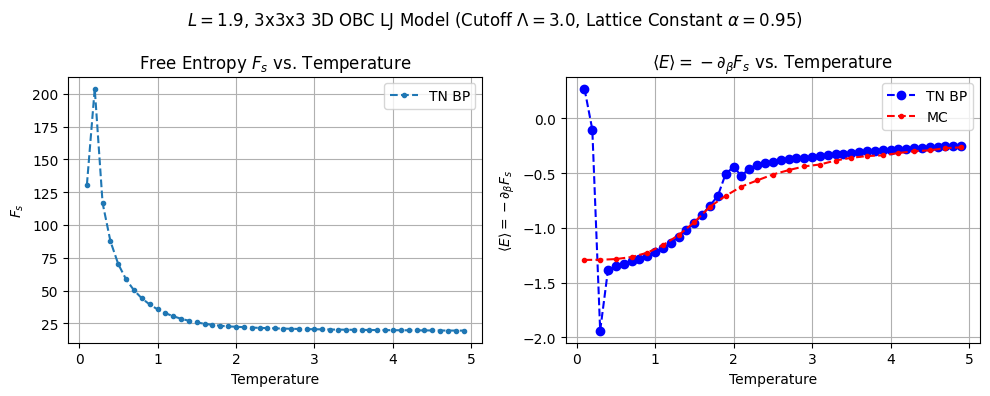

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

a=0.95
N_a = 3
L = a*(N_a-1)

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()


# ax[1].plot(T_tn, numerical_E, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, 'o--', label='TN BP',color='b')
# ax[1].plot(T_tn_e, numerical_E_e, '.-', label='TN exact')
ax[1].plot(T, E, '.--', label='MC',color='r')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/1980553012.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_366/1980553012.py:53: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_e, T_tn_e)


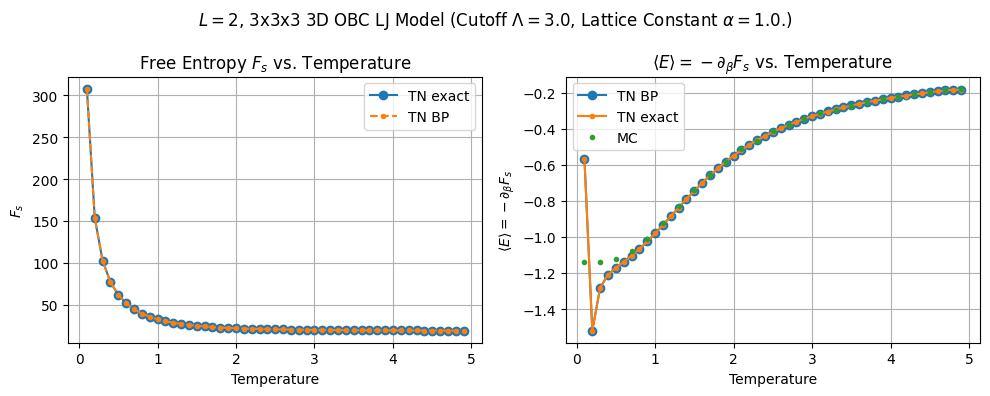

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 3
L = 2

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_e = []
Entropy_e = []

for line in lines:
    line_list = line.split(',')
    T_tn_e.append(float(line_list[0].split('=')[1]))
    Entropy_e.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_e = np.array(T_tn_e)
Entropy_e = np.array(Entropy_e)
dSdT = scipy.gradient(Entropy_e, T_tn_e)
T_sq = T_tn_e**2
numerical_E_e = T_sq * dSdT / N_a**3



# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()


# ax[1].plot(T_tn, numerical_E, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, 'o-', label='TN BP')
ax[1].plot(T_tn_e, numerical_E_e, '.-', label='TN exact')
ax[1].plot(T, E, '.', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_366/1000157316.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


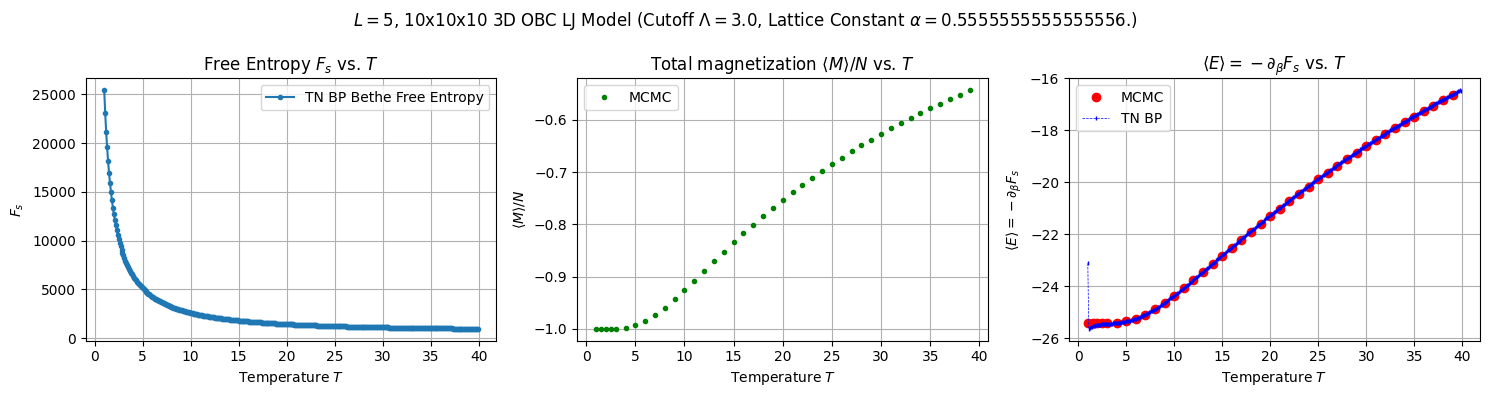

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

N_a = 10
L = 5

# TN BP

# Read from file
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    line_list = line.split(',')
    T_tn_BP.append(float(line_list[0].split('=')[1]))
    Entropy_BP.append(float(line_list[1].split('=')[1].split('\n')[0]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3

# # TN Exact

# # Read from file
# f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
# lines = f.readlines()
# f.close()


# # Extract data
# T_tn = []
# Entropy = []
# M = []

# for line in lines:
#     line_list = line.split(',')
#     T_tn.append(float(line_list[0].split('=')[1]))
#     Entropy.append(float(line_list[1].split('=')[1].split('\n')[0]))

# # Compute the numerical derivative of the entropy with respect to temperature
# T_tn = np.array(T_tn)
# Entropy = np.array(Entropy)
# dSdT = scipy.gradient(Entropy, T_tn)
# T_sq = T_tn**2

# numerical_E = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()+"""
T=20.0
Energy Expectation Value: -21.30120335301263
Total Magnetization Expectation Value: 0.7532500000000006
T=21.0
Energy Expectation Value: -21.010450816917785
Total Magnetization Expectation Value: 0.7386056000000015
T=22.0
Energy Expectation Value: -20.720092918385486
Total Magnetization Expectation Value: 0.7243920000000023
T=23.0
Energy Expectation Value: -20.44069359934478
Total Magnetization Expectation Value: 0.7107280000000038
T=24.0
Energy Expectation Value: -20.165975407453235
Total Magnetization Expectation Value: 0.6976264000000034
T=6.0
Energy Expectation Value: -25.24576626786827
Total Magnetization Expectation Value: 0.9852135999999904
T=25.0
Energy Expectation Value: -19.888879807588193
Total Magnetization Expectation Value: 0.6846600000000005
T=7.0
Energy Expectation Value: -25.091353468074395
Total Magnetization Expectation Value: 0.9739916000000068
T=26.0
Energy Expectation Value: -19.627372665690093
Total Magnetization Expectation Value: 0.6725036000000024
T=8.0
Energy Expectation Value: -24.886555591403464
Total Magnetization Expectation Value: 0.9597620000000087
T=27.0
Energy Expectation Value: -19.366105771914793
Total Magnetization Expectation Value: 0.6603767999999968
T=9.0
Energy Expectation Value: -24.642402472193425
Total Magnetization Expectation Value: 0.9433628000000064
T=28.0
Energy Expectation Value: -19.112376986416713
Total Magnetization Expectation Value: 0.6488215999999976
T=10.0
Energy Expectation Value: -24.371031562657393
Total Magnetization Expectation Value: 0.9259560000000023
T=29.0
Energy Expectation Value: -18.86521863437133
Total Magnetization Expectation Value: 0.637916800000002
T=11.0
Energy Expectation Value: -24.081345277217647
Total Magnetization Expectation Value: 0.907685199999999
T=30.0
Energy Expectation Value: -18.614854464689987
Total Magnetization Expectation Value: 0.6266463999999995
T=12.0
Energy Expectation Value: -23.775103207646698
Total Magnetization Expectation Value: 0.8890779999999999
T=31.0
Energy Expectation Value: -18.37786372749181
Total Magnetization Expectation Value: 0.6164316000000003
T=13.0
Energy Expectation Value: -23.465051997034315
Total Magnetization Expectation Value: 0.8707563999999997
T=32.0
Energy Expectation Value: -18.14110587960606
Total Magnetization Expectation Value: 0.6061560000000004
T=14.0
Energy Expectation Value: -23.150593557755233
Total Magnetization Expectation Value: 0.8524912000000042
T=33.0
Energy Expectation Value: -17.916090645782063
Total Magnetization Expectation Value: 0.5964520000000001
T=15.0
Energy Expectation Value: -22.834125721997655
Total Magnetization Expectation Value: 0.8346003999999982
T=34.0
Energy Expectation Value: -17.692567986796625
Total Magnetization Expectation Value: 0.5868943999999984
T=16.0
Energy Expectation Value: -22.520398726989434
Total Magnetization Expectation Value: 0.8172895999999973
T=35.0
Energy Expectation Value: -17.470822822943177
Total Magnetization Expectation Value: 0.5776415999999984
T=17.0
Energy Expectation Value: -22.21193103891956
Total Magnetization Expectation Value: 0.8007583999999952
T=36.0
Energy Expectation Value: -17.260953826862913
Total Magnetization Expectation Value: 0.5688347999999971
T=18.0
Energy Expectation Value: -21.903106904737594
Total Magnetization Expectation Value: 0.7842695999999965
T=37.0
Energy Expectation Value: -17.047231404826096
Total Magnetization Expectation Value: 0.5599615999999976
T=19.0
Energy Expectation Value: -21.597628005220148
Total Magnetization Expectation Value: 0.768391599999998
T=38.0
Energy Expectation Value: -16.841622696087327
Total Magnetization Expectation Value: 0.5515535999999961
T=39.0
Energy Expectation Value: -16.639071963452388
Total Magnetization Expectation Value: 0.5432991999999958""".split('\n')
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax[0].plot(T_tn, Entropy, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, '.-', label='TN BP Bethe Free Entropy')
ax[0].set_xlabel(r'Temperature $T$')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. $T$')
ax[0].legend()


# ax[2].plot(T_tn, numerical_E, '|-', label='TN exact')
ax[2].plot(T, E, 'o', label='MCMC',color='r')
ax[2].plot(T_tn_BP, numerical_E_BP, '|--', label='TN BP',color='b',linewidth=0.5,markersize=3)
ax[2].set_xlabel(r'Temperature $T$')
ax[2].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[2].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. $T$')
ax[2].legend()

ax[1].plot(T, np.array(M)*-1, '.', color='g', label='MCMC')
ax[1].set_xlabel(r'Temperature $T$')
ax[1].set_ylabel(r'$\langle M\rangle/N$')
ax[1].set_title(r'Total magnetization $\langle M\rangle /N$ vs. $T$')
ax[1].legend()



ax[0].grid()
ax[2].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} 3D OBC LJ Model (Cutoff $\Lambda = 3.0$, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.savefig(f'./L={L}_{N_a}x{N_a}x{N_a}_MC_BP.pdf')
plt.show()


## Occupation number basis

/tmp/ipykernel_366/659253006.py:29: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_366/659253006.py:50: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP_spin, T_tn_BP_spin)
/tmp/ipykernel_366/659253006.py:96: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_e, T_tn_e)


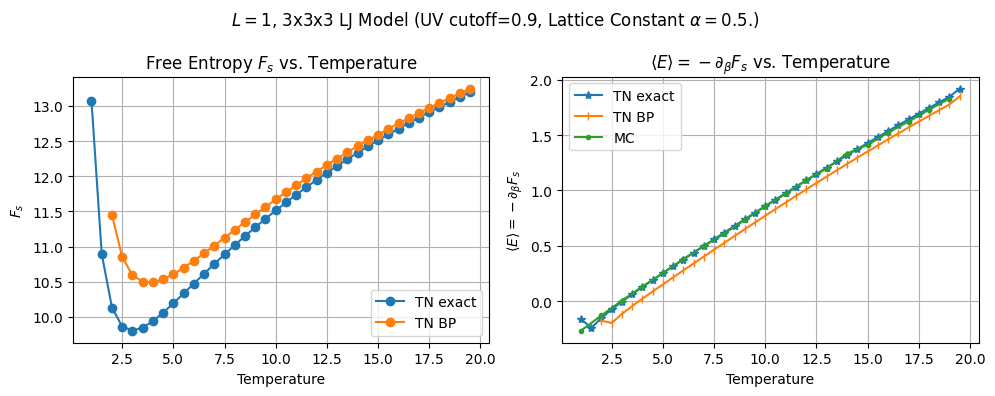

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

L=1
N_a=3

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3

# TN BP spin basis
f = open(f"./3DLJ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP_spin = []
Entropy_BP_spin = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP_spin.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP_spin.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP_spin = np.array(T_tn_BP_spin)
Entropy_BP_spin = np.array(Entropy_BP_spin)
dSdT = scipy.gradient(Entropy_BP_spin, T_tn_BP_spin)
T_sq = T_tn_BP_spin**2
numerical_E_BP_spin = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))

# TN Exact

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_Exact_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_e = []
Entropy_e = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_e.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_e.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_e = np.array(T_tn_e)
Entropy_e = np.array(Entropy_e)
dSdT = scipy.gradient(Entropy_e, T_tn_e)
T_sq = T_tn_e**2
numerical_E_e = T_sq * dSdT / N_a**3





# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (UV cutoff=0.9, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9101/348981022.py:31: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


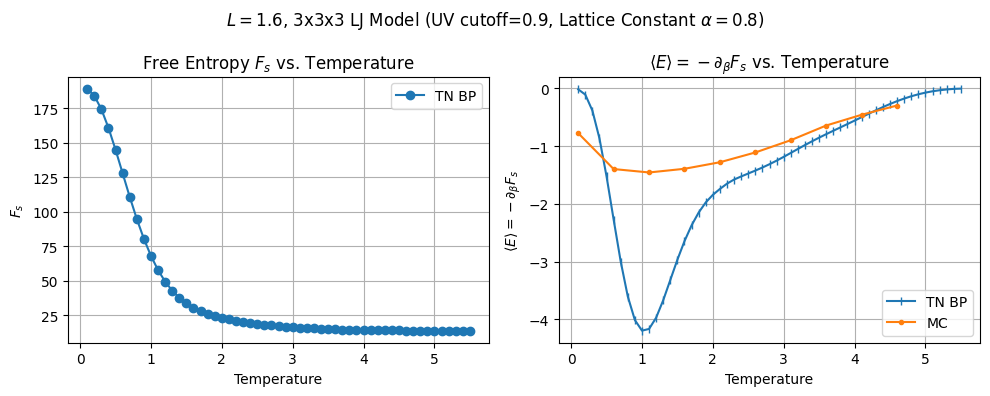

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

a=0.8
N_a=3
L=a*(N_a-1)
# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_cutoff_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
sigma=5
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))


# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (UV cutoff=0.9, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9101/3567785346.py:31: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


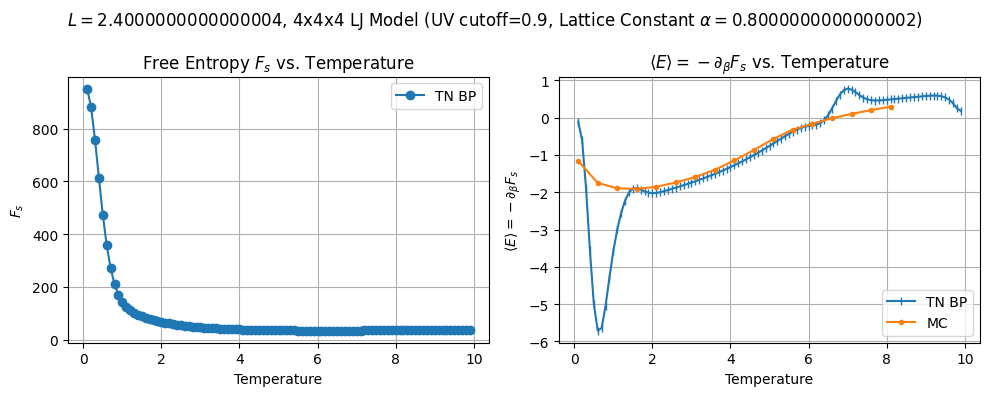

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

a=0.8
N_a=4
L=a*(N_a-1)
# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_cutoff_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP = []
Entropy_BP = []
M = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
sigma=3
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))


# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (UV cutoff=0.9, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9101/2194458174.py:32: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


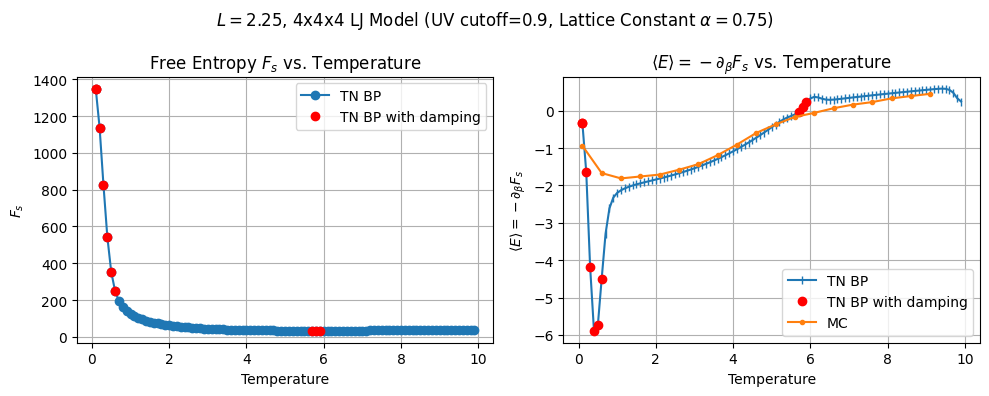

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

a=0.75
N_a=4
L=a*(N_a-1)
# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_cutoff_BP_results.txt", "r")
lines = f.readlines()
f.close()

# Extract data
T_tn_BP = []
Entropy_BP = []
damping = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        damping.append(float(line.split(',')[3].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
sigma=2
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_cutoff_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))


# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[0].plot(T_tn_BP[i], Entropy_BP[i], 'ro')
# label the red point only once
ax[0].plot(T_tn_BP[0], Entropy_BP[0], 'ro', label='TN BP with damping')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[1].plot(T_tn_BP[i], numerical_E_BP[i], 'ro')
# label the red point only once
ax[1].plot(T_tn_BP[0], numerical_E_BP[0], 'ro', label='TN BP with damping')

ax[1].plot(T, E, '.-', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (UV cutoff=0.9, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


In [22]:
def plot_everything(a, N_a, L, input_sigma=2, reverse=False):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy
    from scipy.ndimage import gaussian_filter1d

    # TN BP

    # Read from file
    f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
    lines = f.readlines()
    f.close()


    # Extract data
    T_tn_BP = []
    Entropy_BP = []
    density_BP = []

    for line in lines:
        if line.split(',')[1].split('=')[0] == ' Entropy ':
            Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
            T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
            density_BP.append(float(line.split(',')[4].split('=')[1]))
        # else:
        #     T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        #     Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        #     T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        #     Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
            

    # Compute the numerical derivative of the entropy with respect to temperature
    T_tn_BP = np.array(T_tn_BP)
    Entropy_BP = np.array(Entropy_BP)
    density_BP = np.array(density_BP)
    # sort the data
    idx = np.argsort(T_tn_BP)
    T_tn_BP = T_tn_BP[idx]
    Entropy_BP = Entropy_BP[idx]
    density_BP = density_BP[idx]
    if input_sigma != 0:
        sigma = input_sigma
        Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
    dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
    T_sq = T_tn_BP**2
    numerical_E_BP = T_sq * dSdT / N_a**3

    # TN BP reverse
    if reverse:
        # Read from file
        f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results_reverse.txt", "r")
        lines = f.readlines()
        f.close()
        T_tn_BP_reverse = []
        Entropy_BP_reverse = []
        density_BP_reverse = []

        for line in lines:
            if line.split(',')[1].split('=')[0] == ' Entropy ':
                Entropy_BP_reverse.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
                T_tn_BP_reverse.append(float(line.split(',')[0].split('=')[1]))
                density_BP_reverse.append(float(line.split(',')[4].split('=')[1]))
        
        # Compute the numerical derivative of the entropy with respect to temperature
        T_tn_BP_reverse = np.array(T_tn_BP_reverse)
        Entropy_BP_reverse = np.array(Entropy_BP_reverse)
        density_BP_reverse = np.array(density_BP_reverse)
        # sort the data
        idx = np.argsort(T_tn_BP_reverse)
        T_tn_BP_reverse = T_tn_BP_reverse[idx]
        Entropy_BP_reverse = Entropy_BP_reverse[idx]
        density_BP_reverse = density_BP_reverse[idx]
        sigma = input_sigma
        Entropy_BP_reverse = gaussian_filter1d(Entropy_BP_reverse, sigma)
        dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)
        T_sq = T_tn_BP_reverse**2
        numerical_E_BP_reverse = T_sq * dSdT / N_a**3




    # MC

    # Read from file
    f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
    lines = f.readlines()
    f.close()


    # Extract data
    T = []
    E = []
    density_MC = []

    for line in lines:
        if line.split('=')[0] == 'T':
            T.append(float(line.split('=')[1]))
        elif line.split(' ')[0] == 'Energy':
            E.append(float(line.split(' ')[-1]))
        elif line.split(' ')[0] == 'Occupation':
            density_MC.append(float(line.split(' ')[-1])*N_a**3/L**3)



    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
    if reverse:
        ax[0].plot(T_tn_BP_reverse, Entropy_BP_reverse, '.--', label='TN BP reverse')
    ax[0].set_xlabel('Temperature')
    ax[0].set_ylabel(r'$F_s$')
    ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
    ax[0].legend()

    ax[1].plot(T_tn_BP, numerical_E_BP, '.--', label='TN BP')
    if reverse:
        ax[1].plot(T_tn_BP_reverse, numerical_E_BP_reverse, '.--', label='TN BP reverse')
    ax[1].plot(T, E, '.-', label='MCMC',color='g')
    ax[1].set_xlabel('Temperature')
    ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
    ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
    ax[1].legend()

    ax[2].plot(T_tn_BP, density_BP, '.', label='TN BP')
    if reverse:
        ax[2].plot(T_tn_BP_reverse, density_BP_reverse, '.--', label='TN BP reverse')
    ax[2].plot(T, density_MC, '.-', label='MCMC',color='g')
    ax[2].set_xlabel('Temperature')
    ax[2].set_ylabel(r'$\rho$')
    ax[2].set_title(r'$\rho=N/V$ vs. Temperature')
    ax[2].legend()

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()

    # Add title
    fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

    plt.tight_layout()
    plt.show()


def plot_everything_2D(a, N_a, L, input_sigma=2, reverse=False):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy
    from scipy.ndimage import gaussian_filter1d

    # TN BP

    # Read from file
    f = open(f"./2DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
    lines = f.readlines()
    f.close()


    # Extract data
    T_tn_BP = []
    Entropy_BP = []
    density_BP = []

    for line in lines:
        if line.split(',')[1].split('=')[0] == ' Entropy ':
            Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
            T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
            density_BP.append(float(line.split(',')[4].split('=')[1]))
        # else:
        #     T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        #     Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        #     T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        #     Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
            

    # Compute the numerical derivative of the entropy with respect to temperature
    T_tn_BP = np.array(T_tn_BP)
    Entropy_BP = np.array(Entropy_BP)
    density_BP = np.array(density_BP)
    # sort the data
    idx = np.argsort(T_tn_BP)
    T_tn_BP = T_tn_BP[idx]
    Entropy_BP = Entropy_BP[idx]
    density_BP = density_BP[idx]
    if input_sigma != 0:
        sigma = input_sigma
        Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
    dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
    T_sq = T_tn_BP**2
    numerical_E_BP = T_sq * dSdT / N_a**2

    # TN BP reverse
    if reverse:
        # Read from file
        f = open(f"./2DLJ_occ_L={L}_N_a={N_a}_BP_results_reverse.txt", "r")
        lines = f.readlines()
        f.close()
        T_tn_BP_reverse = []
        Entropy_BP_reverse = []
        density_BP_reverse = []

        for line in lines:
            if line.split(',')[1].split('=')[0] == ' Entropy ':
                Entropy_BP_reverse.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
                T_tn_BP_reverse.append(float(line.split(',')[0].split('=')[1]))
                density_BP_reverse.append(float(line.split(',')[4].split('=')[1]))
        
        # Compute the numerical derivative of the entropy with respect to temperature
        T_tn_BP_reverse = np.array(T_tn_BP_reverse)
        Entropy_BP_reverse = np.array(Entropy_BP_reverse)
        density_BP_reverse = np.array(density_BP_reverse)
        # sort the data
        idx = np.argsort(T_tn_BP_reverse)
        T_tn_BP_reverse = T_tn_BP_reverse[idx]
        Entropy_BP_reverse = Entropy_BP_reverse[idx]
        density_BP_reverse = density_BP_reverse[idx]
        sigma = input_sigma
        Entropy_BP_reverse = gaussian_filter1d(Entropy_BP_reverse, sigma)
        dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)
        T_sq = T_tn_BP_reverse**2
        numerical_E_BP_reverse = T_sq * dSdT / N_a**2




    # MC

    # Read from file
    f = open(f"./MC/2DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
    lines = f.readlines()
    f.close()


    # Extract data
    T = []
    E = []
    density_MC = []

    for line in lines:
        if line.split('=')[0] == 'T':
            T.append(float(line.split('=')[1]))
        elif line.split(' ')[0] == 'Energy':
            E.append(float(line.split(' ')[-1]))
        elif line.split(' ')[0] == 'Occupation':
            density_MC.append(float(line.split(' ')[-1])*N_a**2/L**2)



    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
    if reverse:
        ax[0].plot(T_tn_BP_reverse, Entropy_BP_reverse, '.--', label='TN BP reverse')
    ax[0].set_xlabel('Temperature')
    ax[0].set_ylabel(r'$F_s$')
    ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
    ax[0].legend()

    ax[1].plot(T_tn_BP, numerical_E_BP, '.--', label='TN BP')
    if reverse:
        ax[1].plot(T_tn_BP_reverse, numerical_E_BP_reverse, '.--', label='TN BP reverse')
    ax[1].plot(T, E, '.-', label='MCMC',color='g')
    ax[1].set_xlabel('Temperature')
    ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
    ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
    ax[1].legend()

    ax[2].plot(T_tn_BP, density_BP, '.', label='TN BP')
    if reverse:
        ax[2].plot(T_tn_BP_reverse, density_BP_reverse, '.--', label='TN BP reverse')
    ax[2].plot(T, density_MC, '.-', label='MCMC',color='g')
    ax[2].set_xlabel('Temperature')
    ax[2].set_ylabel(r'$\rho$')
    ax[2].set_title(r'$\rho=N/V$ vs. Temperature')
    ax[2].legend()

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()

    # Add title
    fig.suptitle(rf'$L={L}$, {N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

    plt.tight_layout()
    plt.show()

def plot_everything_2D_noMC(a, N_a, L, input_sigma=2, reverse=False):
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy
    from scipy.ndimage import gaussian_filter1d

    # TN BP

    # Read from file
    f = open(f"./2DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
    lines = f.readlines()
    f.close()


    # Extract data
    T_tn_BP = []
    Entropy_BP = []
    density_BP = []

    for line in lines:
        if line.split(',')[1].split('=')[0] == ' Entropy ':
            Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
            T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
            density_BP.append(float(line.split(',')[4].split('=')[1]))
        # else:
        #     T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        #     Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        #     T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        #     Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
            

    # Compute the numerical derivative of the entropy with respect to temperature
    T_tn_BP = np.array(T_tn_BP)
    Entropy_BP = np.array(Entropy_BP)
    density_BP = np.array(density_BP)
    # sort the data
    idx = np.argsort(T_tn_BP)
    T_tn_BP = T_tn_BP[idx]
    Entropy_BP = Entropy_BP[idx]
    density_BP = density_BP[idx]
    if input_sigma != 0:
        sigma = input_sigma
        Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
    dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
    T_sq = T_tn_BP**2
    numerical_E_BP = T_sq * dSdT / N_a**2

    # TN BP reverse
    if reverse:
        # Read from file
        f = open(f"./2DLJ_occ_L={L}_N_a={N_a}_BP_results_reverse.txt", "r")
        lines = f.readlines()
        f.close()
        T_tn_BP_reverse = []
        Entropy_BP_reverse = []
        density_BP_reverse = []

        for line in lines:
            if line.split(',')[1].split('=')[0] == ' Entropy ':
                Entropy_BP_reverse.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
                T_tn_BP_reverse.append(float(line.split(',')[0].split('=')[1]))
                density_BP_reverse.append(float(line.split(',')[4].split('=')[1]))
        
        # Compute the numerical derivative of the entropy with respect to temperature
        T_tn_BP_reverse = np.array(T_tn_BP_reverse)
        Entropy_BP_reverse = np.array(Entropy_BP_reverse)
        density_BP_reverse = np.array(density_BP_reverse)
        # sort the data
        idx = np.argsort(T_tn_BP_reverse)
        T_tn_BP_reverse = T_tn_BP_reverse[idx]
        Entropy_BP_reverse = Entropy_BP_reverse[idx]
        density_BP_reverse = density_BP_reverse[idx]
        sigma = input_sigma
        Entropy_BP_reverse = gaussian_filter1d(Entropy_BP_reverse, sigma)
        dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)
        T_sq = T_tn_BP_reverse**2
        numerical_E_BP_reverse = T_sq * dSdT / N_a**2



    # Plot
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[0].plot(T_tn_BP, Entropy_BP, '.--', label='TN BP')
    if reverse:
        ax[0].plot(T_tn_BP_reverse, Entropy_BP_reverse, '.--', label='TN BP reverse')
    ax[0].set_xlabel('Temperature')
    ax[0].set_ylabel(r'$F_s$')
    ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
    ax[0].legend()

    ax[1].plot(T_tn_BP, numerical_E_BP, '.--', label='TN BP')
    if reverse:
        ax[1].plot(T_tn_BP_reverse, numerical_E_BP_reverse, '.--', label='TN BP reverse')
    # ax[1].plot(T, E, '.-', label='MCMC',color='g')
    ax[1].set_xlabel('Temperature')
    ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
    ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
    ax[1].legend()

    ax[2].plot(T_tn_BP, density_BP, '.', label='TN BP')
    if reverse:
        ax[2].plot(T_tn_BP_reverse, density_BP_reverse, '.--', label='TN BP reverse')
    # ax[2].plot(T, density_MC, '.-', label='MCMC',color='g')
    ax[2].set_xlabel('Temperature')
    ax[2].set_ylabel(r'$\rho$')
    ax[2].set_title(r'$\rho=N/V$ vs. Temperature')
    ax[2].legend()

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()

    # Add title
    fig.suptitle(rf'$L={L}$, {N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

    plt.tight_layout()
    plt.show()


def plot_T_rho_diagram(data, a, N_a):
    import re
    import numpy as np
    import matplotlib.pyplot as plt
    # Initialize lists to store the temperature and density values
    temperature = []
    density = []
    
    # Regular expression pattern to extract temperature and density
    pattern = r"T=([0-9.]+), .*density N/V=([0-9.]+)"
    
    # Parse each line of data
    for line in data:
        match = re.search(pattern, line)
        if match:
            # Append the temperature and density to their respective lists
            temperature.append(float(match.group(1)))
            density.append(float(match.group(2)))
    
    # Plotting the temperature-density diagram
    plt.figure(figsize=(6, 10))
    plt.plot(density, temperature, 'o', label=r'$\rho$ vs $T$')
    
    # Adding labels and title
    plt.ylabel(r'Temperature $T$')
    plt.xlabel(r'Density $\rho$')
    plt.title(rf'2D LJ-model $\rho-T, a={a}, N_a={N_a}, L={a*(N_a-1)}$')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

def plot_mu_rho(data, T0, N_a, a):
    import numpy as np
    import matplotlib.pyplot as plt
    data = data.split('\n')
    T = []
    Entropy = []
    damping = []
    density = []
    chemical_potential = []
    for line in data:
        if line != '':
            T.append(float(line.split(',')[0].split('=')[1]))
            Entropy.append(float(line.split(',')[1].split('=')[1]))
            damping.append(float(line.split(',')[3].split('=')[1]))
            density.append(float(line.split(',')[4].split('=')[1]))
            chemical_potential.append(float(line.split(',')[5].split('=')[1]))

    T = np.array(T)
    Entropy = np.array(Entropy)
    damping = np.array(damping)
    density = np.array(density)
    chemical_potential = np.array(chemical_potential)
    free_energy = -Entropy/T
    # sort the data
    idx = np.argsort(chemical_potential)
    T = T[idx]
    Entropy = Entropy[idx]
    damping = damping[idx]
    density = density[idx]
    chemical_potential = chemical_potential[idx]

    # Plot density vs. chemical potential and entropy vs. chemical potential
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    ax[0].plot(chemical_potential, density, '.--', label=r'TN BP density $\rho=N/V$')
    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$\rho$')
    ax[0].set_title('Density vs. Chemical Potential')

    ax[1].plot(chemical_potential, Entropy, '.--',label=r'TN BP free entropy $F=ln(Z)=-\beta \Omega$')
    ax[1].set_xlabel(r'$\mu$')
    ax[1].set_ylabel(r'$F$')
    ax[1].set_title('Free Entropy vs. Chemical Potential')

    ax[2].plot(density, free_energy, '.--',label=r'TN BP free energy $\Omega=-\beta ln(Z)$')
    ax[2].set_xlabel(r'$\rho$')
    ax[2].set_ylabel(r'$\Omega$')
    ax[2].set_title(r'Grand potential $\Omega$ vs. Density')


    ax[0].grid()
    ax[1].grid()
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[2].grid()

    L = a*(N_a-1)
    # Add title
    fig.suptitle(rf'$L={L}$, {N_a}x{N_a} LJ Model. Lattice Constant $a={L/(N_a-1)}$, temperature $T={T0}$')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_9101/425017976.py:45: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


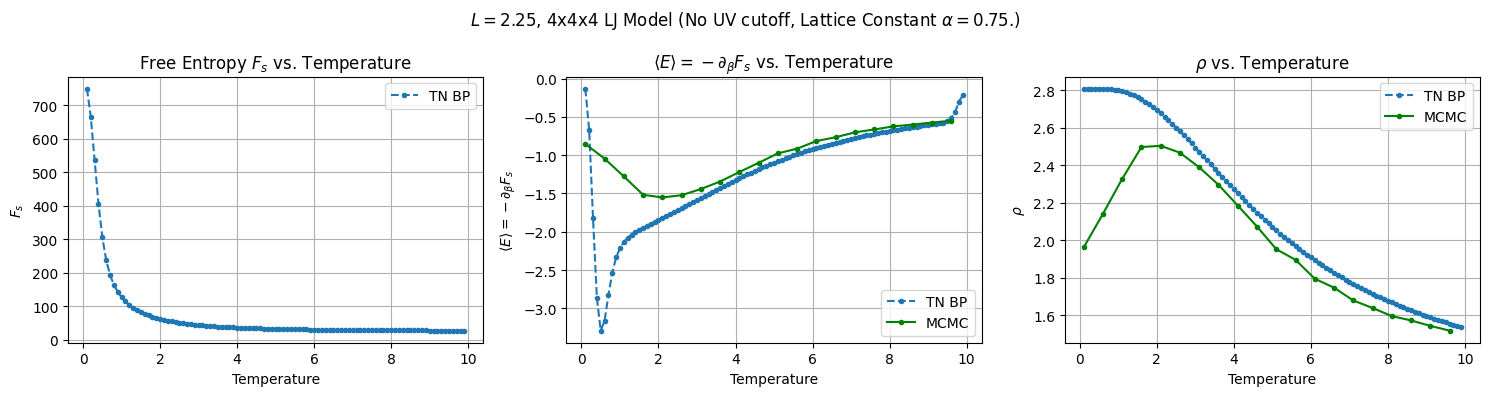

In [236]:
a=0.75
N_a=4
L=a*(N_a-1)
plot_everything(a, N_a, L, input_sigma=2)

/tmp/ipykernel_9101/2870163533.py:44: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


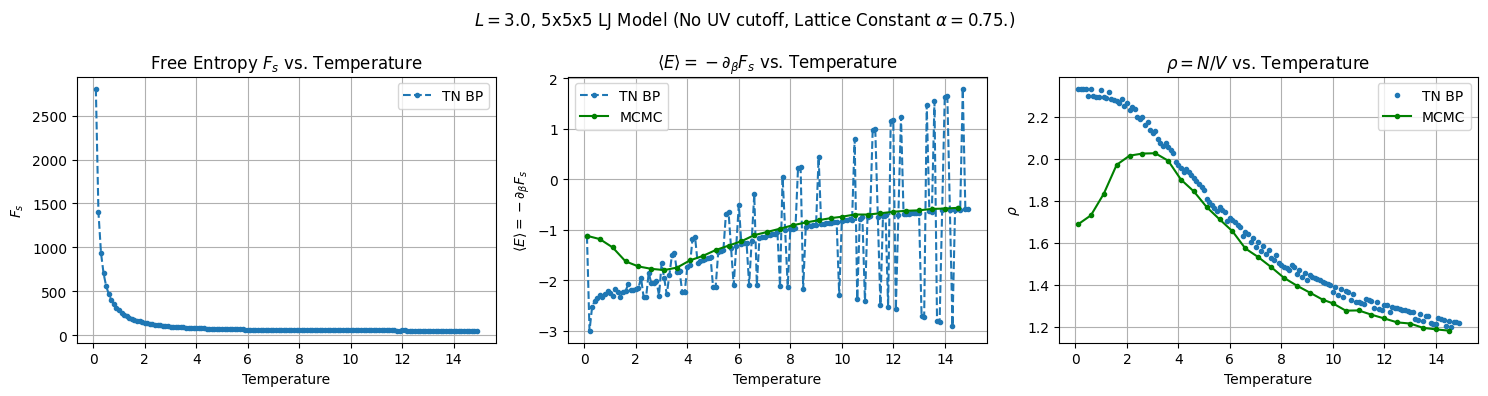

In [350]:
a=0.75
N_a=5
L=a*(N_a-1)
plot_everything(a, N_a, L, input_sigma=0)

/tmp/ipykernel_9101/2870163533.py:44: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


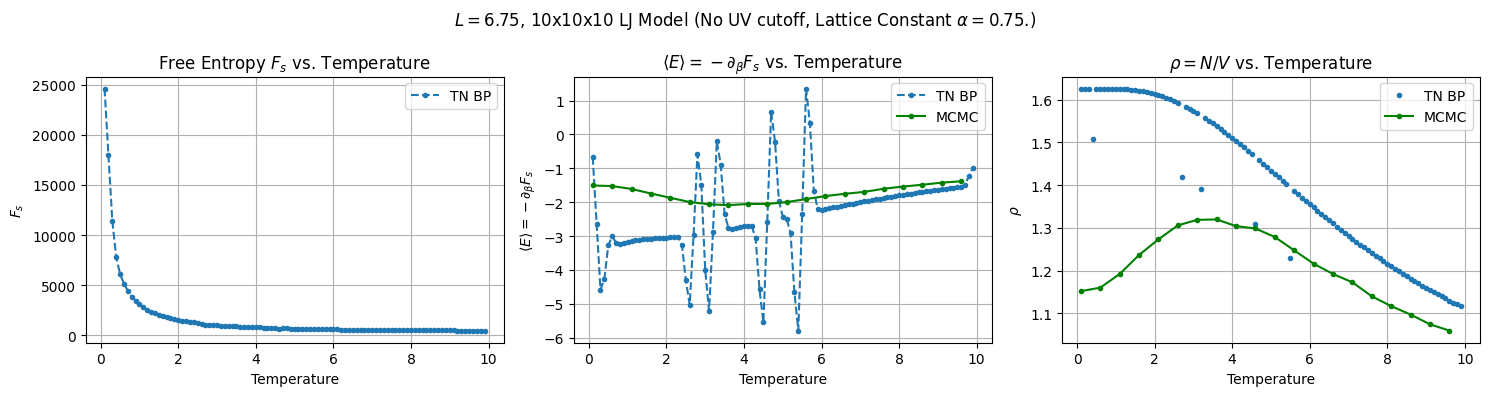

In [341]:
a=0.75
N_a=10
L=a*(N_a-1)
plot_everything(a, N_a, L, input_sigma=1)

/tmp/ipykernel_9101/2870163533.py:44: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


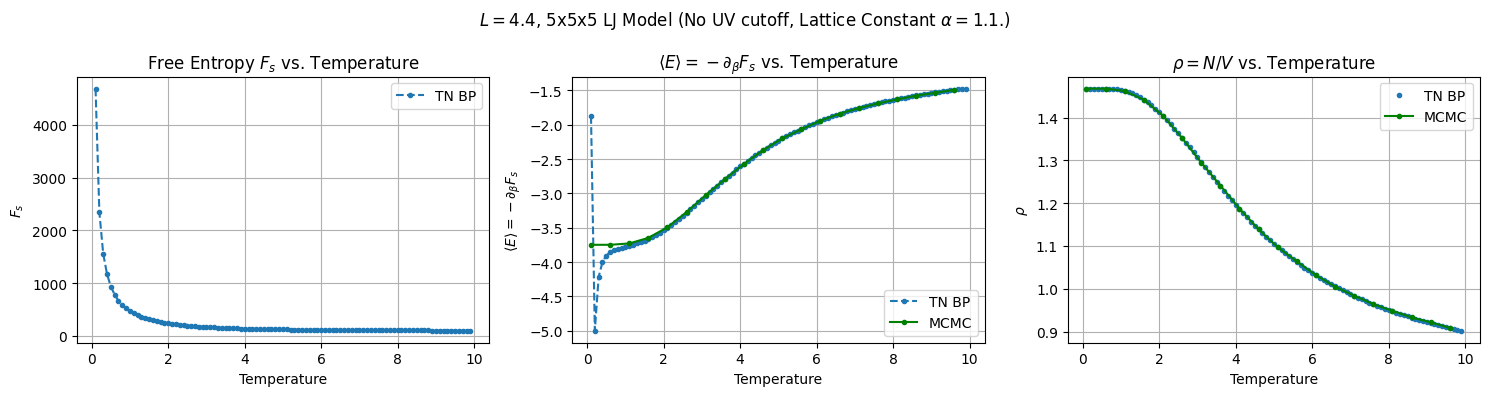

In [353]:
a=1.1
N_a=5
L=a*(N_a-1)
plot_everything(a, N_a, L, input_sigma=0)

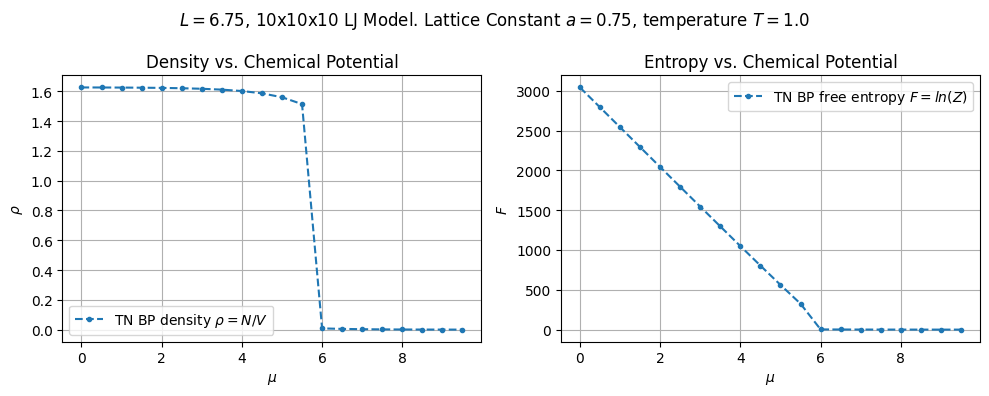

In [374]:
data = """
T=1.0, Entropy = 3041.1984245846397, Converged=True, damping=0.3, density N/V=1.625272742302146, chemical potential=0.0
T=1.0, Entropy = 2791.297191122767, Converged=True, damping=0.3, density N/V=1.6249533049850584, chemical potential=0.5
T=1.0, Entropy = 2541.4594775628143, Converged=True, damping=0.3, density N/V=1.6244301129885355, chemical potential=1.0
T=1.0, Entropy = 2291.7256049645034, Converged=True, damping=0.3, density N/V=1.6235763573492805, chemical potential=1.5
T=1.0, Entropy = 2042.1607311964956, Converged=True, damping=0.3, density N/V=1.6221903478140842, chemical potential=2.0
T=1.0, Entropy = 1792.8692972302629, Converged=True, damping=0.3, density N/V=1.6199543807628471, chemical potential=2.5
T=1.0, Entropy = 1544.017574513089, Converged=True, damping=0.3, density N/V=1.6163672429863734, chemical potential=3.0
T=1.0, Entropy = 1295.8706843669368, Converged=True, damping=0.3, density N/V=1.610613699504647, chemical potential=3.5
T=1.0, Entropy = 1048.8600796422995, Converged=True, damping=0.3, density N/V=1.6012769337877832, chemical potential=4.0
T=1.0, Entropy = 803.7162418357693, Converged=True, damping=0.3, density N/V=1.5857626214551652, chemical potential=4.5
T=1.0, Entropy = 561.7087683255588, Converged=True, damping=0.3, density N/V=1.559514424461096, chemical potential=5.0
T=1.0, Entropy = 325.07834984652663, Converged=True, damping=0.3, density N/V=1.5134353984340863, chemical potential=5.5
T=1.0, Entropy = 2.5447433536971396, Converged=True, damping=0.3, density N/V=0.008501375002641655, chemical potential=6.0
T=1.0, Entropy = 1.5271777404170082, Converged=True, damping=0.3, density N/V=0.0050454766538094485, chemical potential=6.5
T=1.0, Entropy = 0.920500571840192, Converged=True, damping=0.3, density N/V=0.0030216279243597613, chemical potential=7.0
T=1.0, Entropy = 0.5562301988148468, Converged=True, damping=0.3, density N/V=0.001818954640485901, chemical potential=7.5
T=1.0, Entropy = 0.3366144789622987, Converged=True, damping=0.3, density N/V=0.001098286736305449, chemical potential=8.0
T=1.0, Entropy = 0.20389091119540947, Converged=True, damping=0.3, density N/V=0.0006643387166028356, chemical potential=8.5
T=1.0, Entropy = 0.12356498250681591, Converged=True, damping=0.3, density N/V=0.00040228199446135007, chemical potential=9.0
T=1.0, Entropy = 0.07490885773209277, Converged=True, damping=0.3, density N/V=0.00024375463596468762, chemical potential=9.5
"""

data = data.split('\n')
T = []
Entropy = []
damping = []
density = []
chemical_potential = []
for line in data:
    if line != '':
        T.append(float(line.split(',')[0].split('=')[1]))
        Entropy.append(float(line.split(',')[1].split('=')[1]))
        damping.append(float(line.split(',')[3].split('=')[1]))
        density.append(float(line.split(',')[4].split('=')[1]))
        chemical_potential.append(float(line.split(',')[5].split('=')[1]))

T = np.array(T)
Entropy = np.array(Entropy)
damping = np.array(damping)
density = np.array(density)
chemical_potential = np.array(chemical_potential)
# sort the data
idx = np.argsort(chemical_potential)
T = T[idx]
Entropy = Entropy[idx]
damping = damping[idx]
density = density[idx]
chemical_potential = chemical_potential[idx]

# Plot density vs. chemical potential and entropy vs. chemical potential
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(chemical_potential, density, '.--', label=r'TN BP density $\rho=N/V$')
ax[0].set_xlabel(r'$\mu$')
ax[0].set_ylabel(r'$\rho$')
ax[0].set_title('Density vs. Chemical Potential')

ax[1].plot(chemical_potential, Entropy, '.--',label=r'TN BP free entropy $F=ln(Z)$')
ax[1].set_xlabel(r'$\mu$')
ax[1].set_ylabel(r'$F$')
ax[1].set_title('Entropy vs. Chemical Potential')

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

a = 0.75
N_a = 10
L = a*(N_a-1)
# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model. Lattice Constant $a={L/(N_a-1)}$, temperature $T=1.0$')

plt.tight_layout()
plt.show()

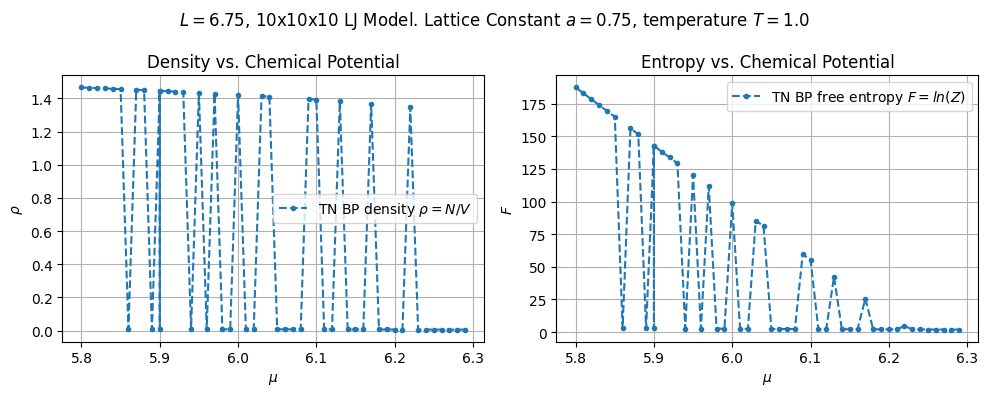

In [373]:
data = """
T=1.0, Entropy = 2.820543744548524, Converged=True, damping=0.3, density N/V=0.009451930960572402, chemical potential=5.899999999999999
T=1.0, Entropy = 187.45794101291702, Converged=True, damping=0.3, density N/V=1.4663790565108366, chemical potential=5.8
T=1.0, Entropy = 182.9511100019655, Converged=True, damping=0.3, density N/V=1.4644420117887413, chemical potential=5.81
T=1.0, Entropy = 178.45027671270344, Converged=True, damping=0.3, density N/V=1.462478641395921, chemical potential=5.819999999999999
T=1.0, Entropy = 173.95552261226288, Converged=True, damping=0.3, density N/V=1.4604886115888924, chemical potential=5.829999999999999
T=1.0, Entropy = 169.46693025672627, Converged=True, damping=0.3, density N/V=1.458471546803231, chemical potential=5.839999999999999
T=1.0, Entropy = 164.9845834304044, Converged=True, damping=0.3, density N/V=1.456427022790892, chemical potential=5.849999999999999
T=1.0, Entropy = 2.93933091946846, Converged=True, damping=0.3, density N/V=0.009863223751696425, chemical potential=5.8599999999999985
T=1.0, Entropy = 156.03896862948278, Converged=True, damping=0.3, density N/V=1.4522536131850041, chemical potential=5.869999999999998
T=1.0, Entropy = 151.5758759241769, Converged=True, damping=0.3, density N/V=1.4501235694147572, chemical potential=5.879999999999998
T=1.0, Entropy = 2.8497680049829714, Converged=True, damping=0.3, density N/V=0.009553011755140003, chemical potential=5.889999999999998
T=1.0, Entropy = 142.66957283134346, Converged=True, damping=0.3, density N/V=1.4457733261876053, chemical potential=5.899999999999998
T=1.0, Entropy = 142.66957283134178, Converged=True, damping=0.3, density N/V=1.4457733261867796, chemical potential=5.9
T=1.0, Entropy = 138.2265505939213, Converged=True, damping=0.3, density N/V=1.4435514677739825, chemical potential=5.91
T=1.0, Entropy = 133.7904112197954, Converged=True, damping=0.3, density N/V=1.4412971765050335, chemical potential=5.92
T=1.0, Entropy = 129.36125611093306, Converged=True, damping=0.3, density N/V=1.4390093558453263, chemical potential=5.93
T=1.0, Entropy = 2.7067033521385047, Converged=True, damping=0.3, density N/V=0.009058837518884717, chemical potential=5.9399999999999995
T=1.0, Entropy = 120.52432248997418, Converged=True, damping=0.3, density N/V=1.4343281133200187, chemical potential=5.949999999999999
T=1.0, Entropy = 2.6515695496532126, Converged=True, damping=0.3, density N/V=0.008868833394419927, chemical potential=5.959999999999999
T=1.0, Entropy = 111.71663945471882, Converged=True, damping=0.3, density N/V=1.4294963226339537, chemical potential=5.969999999999999
T=1.0, Entropy = 2.597591424443416, Converged=True, damping=0.3, density N/V=0.008683047189982659, chemical potential=5.979999999999999
T=1.0, Entropy = 2.5710277088653792, Converged=True, damping=0.3, density N/V=0.00859170321866168, chemical potential=5.989999999999998
T=1.0, Entropy = 98.562100955615, Converged=True, damping=0.3, density N/V=1.4219352524306899, chemical potential=6.0
T=1.0, Entropy = 2.5187352541695565, Converged=True, damping=0.3, density N/V=0.008412050025937484, chemical potential=6.01
T=1.0, Entropy = 2.493000343856264, Converged=True, damping=0.3, density N/V=0.008323715954678176, chemical potential=6.02
T=1.0, Entropy = 85.47925439485105, Converged=True, damping=0.3, density N/V=1.4139445674397393, chemical potential=6.029999999999999
T=1.0, Entropy = 81.13495929357576, Converged=True, damping=0.3, density N/V=1.4111729644544018, chemical potential=6.039999999999999
T=1.0, Entropy = 2.417404646309287, Converged=True, damping=0.3, density N/V=0.008064538498377755, chemical potential=6.049999999999999
T=1.0, Entropy = 2.392732574007595, Converged=True, damping=0.3, density N/V=0.007980048239500506, chemical potential=6.059999999999999
T=1.0, Entropy = 2.3683189130631006, Converged=True, damping=0.3, density N/V=0.007896489836267683, chemical potential=6.0699999999999985
T=1.0, Entropy = 2.344160814783351, Converged=True, damping=0.3, density N/V=0.00781385198111172, chemical potential=6.079999999999998
T=1.0, Entropy = 59.5466210063184, Converged=True, damping=0.3, density N/V=1.3963522562784703, chemical potential=6.089999999999998
T=1.0, Entropy = 55.257059423060646, Converged=True, damping=0.3, density N/V=1.393167687621138, chemical potential=6.1
T=1.0, Entropy = 2.2731919277276553, Converged=True, damping=0.3, density N/V=0.007571351019223001, chemical potential=6.109999999999999
T=1.0, Entropy = 2.2500282793978683, Converged=True, damping=0.3, density N/V=0.007492285449276689, chemical potential=6.119999999999999
T=1.0, Entropy = 42.44897953572067, Converged=True, damping=0.3, density N/V=1.3830921251652328, chemical potential=6.129999999999999
T=1.0, Entropy = 2.2044238207940703, Converged=True, damping=0.3, density N/V=0.007336743012481651, chemical potential=6.139999999999999
T=1.0, Entropy = 2.181977745217897, Converged=True, damping=0.3, density N/V=0.007260245519501098, chemical potential=6.149999999999999
T=1.0, Entropy = 2.1597656476980656, Converged=True, damping=0.3, density N/V=0.007184583664432081, chemical potential=6.159999999999998
T=1.0, Entropy = 25.523802100053036, Converged=True, damping=0.3, density N/V=1.3682643676595099, chemical potential=6.169999999999998
T=1.0, Entropy = 2.116033198913381, Converged=True, damping=0.3, density N/V=0.007035727169008139, chemical potential=6.179999999999998
T=1.0, Entropy = 2.0945078291353196, Converged=True, damping=0.3, density N/V=0.00696251302005146, chemical potential=6.189999999999998
T=1.0, Entropy = 2.0732063998340866, Converged=True, damping=0.3, density N/V=0.006890095487165372, chemical potential=6.1999999999999975
T=1.0, Entropy = 2.0521264754566544, Converged=True, damping=0.3, density N/V=0.006818465146752885, chemical potential=6.21
T=1.0, Entropy = 4.641924869715715, Converged=True, damping=0.3, density N/V=1.347176400628336, chemical potential=6.22
T=1.0, Entropy = 2.010621543395836, Converged=True, damping=0.3, density N/V=0.006677528988087096, chemical potential=6.2299999999999995
T=1.0, Entropy = 1.9901918072037341, Converged=True, damping=0.3, density N/V=0.006608204955663012, chemical potential=6.239999999999999
T=1.0, Entropy = 1.9699741181077763, Converged=True, damping=0.3, density N/V=0.006539631683145282, chemical potential=6.249999999999999
T=1.0, Entropy = 1.9499661807977442, Converged=True, damping=0.3, density N/V=0.006471800367615428, chemical potential=6.259999999999999
T=1.0, Entropy = 1.930165726805423, Converged=True, damping=0.3, density N/V=0.006404702324239687, chemical potential=6.269999999999999
T=1.0, Entropy = 1.9105705141731424, Converged=True, damping=0.3, density N/V=0.006338328984376071, chemical potential=6.2799999999999985
T=1.0, Entropy = 1.8911783271388587, Converged=True, damping=0.3, density N/V=0.006272671893615093, chemical potential=6.289999999999998
"""

data = data.split('\n')
T = []
Entropy = []
damping = []
density = []
chemical_potential = []
for line in data:
    if line != '':
        T.append(float(line.split(',')[0].split('=')[1]))
        Entropy.append(float(line.split(',')[1].split('=')[1]))
        damping.append(float(line.split(',')[3].split('=')[1]))
        density.append(float(line.split(',')[4].split('=')[1]))
        chemical_potential.append(float(line.split(',')[5].split('=')[1]))

T = np.array(T)
Entropy = np.array(Entropy)
damping = np.array(damping)
density = np.array(density)
chemical_potential = np.array(chemical_potential)
# sort the data
idx = np.argsort(chemical_potential)
T = T[idx]
Entropy = Entropy[idx]
damping = damping[idx]
density = density[idx]
chemical_potential = chemical_potential[idx]

# Plot density vs. chemical potential and entropy vs. chemical potential
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(chemical_potential, density, '.--', label=r'TN BP density $\rho=N/V$')
ax[0].set_xlabel(r'$\mu$')
ax[0].set_ylabel(r'$\rho$')
ax[0].set_title('Density vs. Chemical Potential')

ax[1].plot(chemical_potential, Entropy, '.--',label=r'TN BP free entropy $F=ln(Z)$')
ax[1].set_xlabel(r'$\mu$')
ax[1].set_ylabel(r'$F$')
ax[1].set_title('Entropy vs. Chemical Potential')

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

a = 0.75
N_a = 10
L = a*(N_a-1)
# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model. Lattice Constant $a={L/(N_a-1)}$, temperature $T=1.0$')

plt.tight_layout()
plt.show()

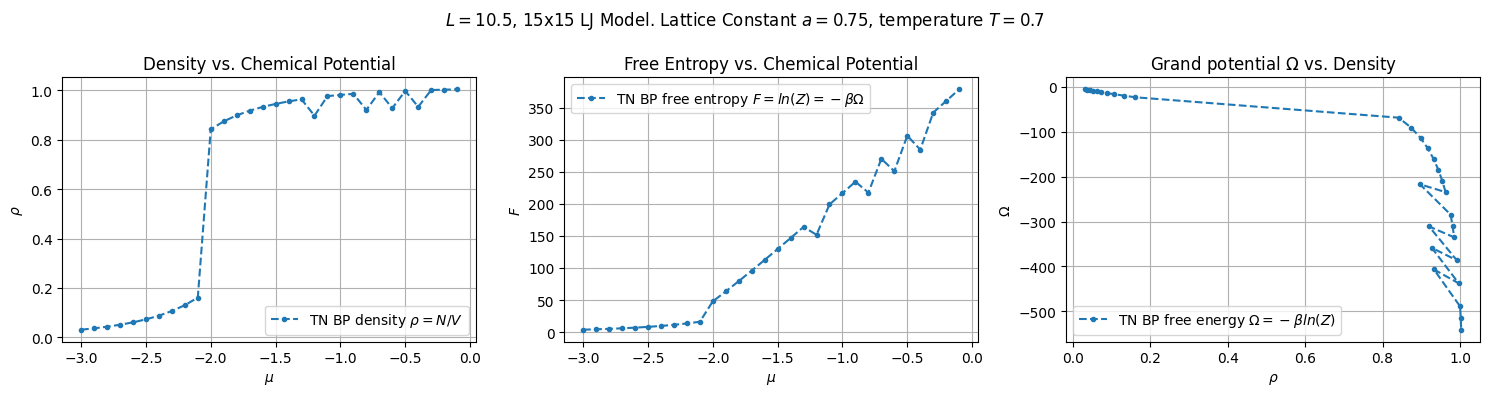

In [423]:
data = """
T=0.7, Entropy = 3.728643682548539, Converged=True, damping=0.3, density N/V=0.031213232233881345, chemical potential=-3.0
T=0.7, Entropy = 4.341014172219876, Converged=True, damping=0.3, density N/V=0.03669013641336301, chemical potential=-2.9
T=0.7, Entropy = 5.062027188637015, Converged=True, damping=0.3, density N/V=0.04327129191614182, chemical potential=-2.8
T=0.7, Entropy = 5.914053090042257, Converged=True, damping=0.3, density N/V=0.05123567223503237, chemical potential=-2.6999999999999997
T=0.7, Entropy = 6.925294842064139, Converged=True, damping=0.3, density N/V=0.06095471003168273, chemical potential=-2.5999999999999996
T=0.7, Entropy = 8.131780681055371, Converged=True, damping=0.3, density N/V=0.07293000959617726, chemical potential=-2.4999999999999996
T=0.7, Entropy = 9.580165576513535, Converged=True, damping=0.3, density N/V=0.0878453205997282, chemical potential=-2.3999999999999995
T=0.7, Entropy = 11.331581347065166, Converged=True, damping=0.3, density N/V=0.10662844454091569, chemical potential=-2.2999999999999994
T=0.7, Entropy = 13.466476537573548, Converged=True, damping=0.3, density N/V=0.13048773979579947, chemical potential=-2.1999999999999993
T=0.7, Entropy = 16.089013419932314, Converged=True, damping=0.3, density N/V=0.16079111842766083, chemical potential=-2.099999999999999
T=0.7, Entropy = 47.90218719641513, Converged=True, damping=0.3, density N/V=0.8413911295871556, chemical potential=-1.9999999999999991
T=0.7, Entropy = 63.422224720441385, Converged=True, damping=0.3, density N/V=0.8737378287530421, chemical potential=-1.899999999999999
T=0.7, Entropy = 79.4492438137613, Converged=True, damping=0.3, density N/V=0.8980571627180388, chemical potential=-1.799999999999999
T=0.7, Entropy = 95.86442706175862, Converged=True, damping=0.3, density N/V=0.9170016816349174, chemical potential=-1.6999999999999988
T=0.7, Entropy = 112.58572344548077, Converged=True, damping=0.3, density N/V=0.9321192854664219, chemical potential=-1.5999999999999988
T=0.7, Entropy = 129.5534559850523, Converged=True, damping=0.3, density N/V=0.9443942039994682, chemical potential=-1.4999999999999987
T=0.7, Entropy = 146.72260719015344, Converged=True, damping=0.3, density N/V=0.9544915748798347, chemical potential=-1.3999999999999986
T=0.7, Entropy = 164.05828783326544, Converged=True, damping=0.3, density N/V=0.9628815040841336, chemical potential=-1.2999999999999985
T=0.7, Entropy = 151.79502978672332, Converged=True, damping=0.35, density N/V=0.8966190370741022, chemical potential=-1.1999999999999984
T=0.7, Entropy = 199.12420240598095, Converged=True, damping=0.3, density N/V=0.9758293089359596, chemical potential=-1.0999999999999983
T=0.7, Entropy = 216.81412250550432, Converged=True, damping=0.3, density N/V=0.9808447049953907, chemical potential=-0.9999999999999982
T=0.7, Entropy = 234.58773340305055, Converged=True, damping=0.3, density N/V=0.9851100250896503, chemical potential=-0.8999999999999981
T=0.7, Entropy = 217.58090876184238, Converged=True, damping=0.39999999999999997, density N/V=0.9200794300123507, chemical potential=-0.799999999999998
T=0.7, Entropy = 270.3384572078683, Converged=True, damping=0.3, density N/V=0.9918633552313884, chemical potential=-0.699999999999998
T=0.7, Entropy = 250.9887156056367, Converged=True, damping=0.44999999999999996, density N/V=0.9273021938805697, chemical potential=-0.5999999999999979
T=0.7, Entropy = 306.2992322709046, Converged=True, damping=0.3, density N/V=0.9968272747773927, chemical potential=-0.4999999999999978
T=0.7, Entropy = 284.6217524259905, Converged=True, damping=0.39999999999999997, density N/V=0.9326387264613991, chemical potential=-0.3999999999999977
T=0.7, Entropy = 342.41493549744774, Converged=True, damping=0.3, density N/V=1.000500839908334, chemical potential=-0.2999999999999976
T=0.7, Entropy = 360.51792705509797, Converged=True, damping=0.3, density N/V=1.0019668508299575, chemical potential=-0.1999999999999975
T=0.7, Entropy = 378.64556369185834, Converged=True, damping=0.3, density N/V=1.0032321142679146, chemical potential=-0.09999999999999742
"""

plot_mu_rho(data, T0=0.7,a=0.75, N_a=15)


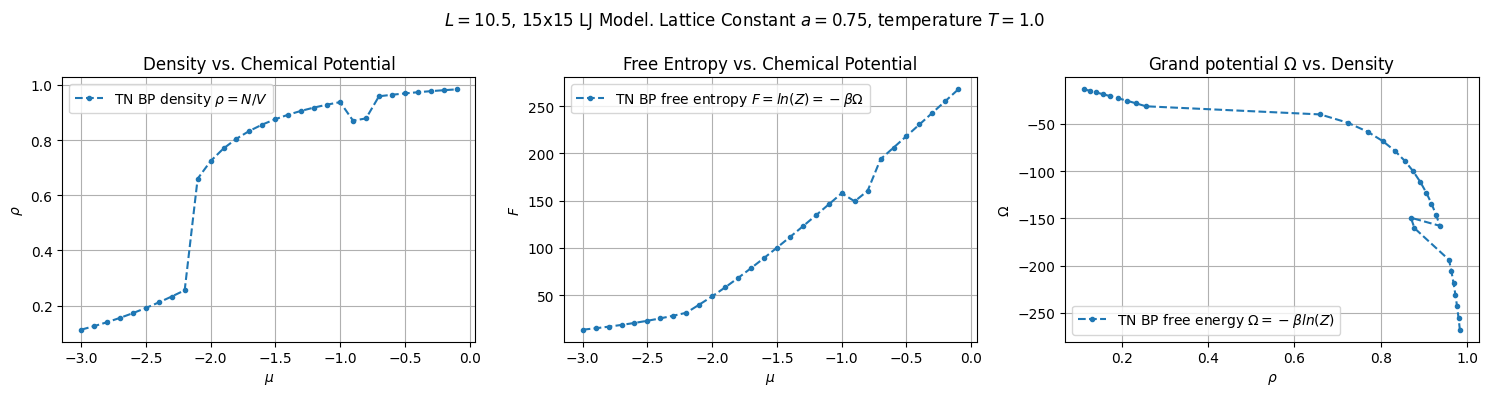

In [424]:
data = """
T=1.0, Entropy = 13.581499811308262, Converged=True, damping=0.3, density N/V=0.11302203275730593, chemical potential=-3.0
T=1.0, Entropy = 15.091783597897994, Converged=True, damping=0.3, density N/V=0.12586326446316906, chemical potential=-2.9
T=1.0, Entropy = 16.77325735703242, Converged=True, damping=0.3, density N/V=0.14008901103647634, chemical potential=-2.8
T=1.0, Entropy = 18.643954293379185, Converged=True, damping=0.3, density N/V=0.15577562439847478, chemical potential=-2.6999999999999997
T=1.0, Entropy = 20.72268172642221, Converged=True, damping=0.3, density N/V=0.1729667796902352, chemical potential=-2.5999999999999996
T=1.0, Entropy = 23.028518824785724, Converged=True, damping=0.3, density N/V=0.19165944824353615, chemical potential=-2.4999999999999996
T=1.0, Entropy = 25.58014305367038, Converged=True, damping=0.3, density N/V=0.21179141968883583, chemical potential=-2.3999999999999995
T=1.0, Entropy = 28.395028107822824, Converged=True, damping=0.3, density N/V=0.2332341347563189, chemical potential=-2.2999999999999994
T=1.0, Entropy = 31.488604316698073, Converged=True, damping=0.3, density N/V=0.2557944079992019, chemical potential=-2.1999999999999993
T=1.0, Entropy = 40.08860245999503, Converged=True, damping=0.3, density N/V=0.6598749757519212, chemical potential=-2.099999999999999
T=1.0, Entropy = 48.86824254282711, Converged=True, damping=0.3, density N/V=0.723564343824007, chemical potential=-1.9999999999999991
T=1.0, Entropy = 58.33025389068695, Converged=True, damping=0.3, density N/V=0.7694784802234153, chemical potential=-1.899999999999999
T=1.0, Entropy = 68.30149445390504, Converged=True, damping=0.3, density N/V=0.8048149198973673, chemical potential=-1.799999999999999
T=1.0, Entropy = 78.67239537476858, Converged=True, damping=0.3, density N/V=0.833056818968544, chemical potential=-1.6999999999999988
T=1.0, Entropy = 89.36682404082033, Converged=True, damping=0.3, density N/V=0.8561977407740372, chemical potential=-1.5999999999999988
T=1.0, Entropy = 100.32875899029487, Converged=True, damping=0.3, density N/V=0.8754991297689375, chemical potential=-1.4999999999999987
T=1.0, Entropy = 111.51533673066118, Converged=True, damping=0.3, density N/V=0.8918151492180099, chemical potential=-1.3999999999999986
T=1.0, Entropy = 122.89281788296607, Converged=True, damping=0.3, density N/V=0.9057525128019367, chemical potential=-1.2999999999999985
T=1.0, Entropy = 134.43406522591303, Converged=True, damping=0.3, density N/V=0.9177585951793428, chemical potential=-1.1999999999999984
T=1.0, Entropy = 146.1168763354698, Converged=True, damping=0.3, density N/V=0.9281725059493396, chemical potential=-1.0999999999999983
T=1.0, Entropy = 157.92283264778223, Converged=True, damping=0.3, density N/V=0.9372573076487763, chemical potential=-0.9999999999999982
T=1.0, Entropy = 149.36445738198114, Converged=False, damping=0.44999999999999996, density N/V=0.8699742203935306, chemical potential=-0.8999999999999981, Not Converged!
T=1.0, Entropy = 160.42932169900277, Converged=True, damping=0.35, density N/V=0.8783549949609312, chemical potential=-0.799999999999998
T=1.0, Entropy = 193.93634967408408, Converged=True, damping=0.3, density N/V=0.9584205714799011, chemical potential=-0.699999999999998
T=1.0, Entropy = 206.1017555791312, Converged=True, damping=0.3, density N/V=0.9639044027742767, chemical potential=-0.5999999999999979
T=1.0, Entropy = 218.33259320134638, Converged=True, damping=0.3, density N/V=0.9687745731756323, chemical potential=-0.4999999999999978
T=1.0, Entropy = 230.62160476534285, Converged=True, damping=0.3, density N/V=0.9731092816614462, chemical potential=-0.3999999999999977
T=1.0, Entropy = 242.96244375512865, Converged=True, damping=0.3, density N/V=0.9769747556140657, chemical potential=-0.2999999999999976
T=1.0, Entropy = 255.34953829888232, Converged=True, damping=0.3, density N/V=0.9804275085510047, chemical potential=-0.1999999999999975
T=1.0, Entropy = 267.7779795904775, Converged=True, damping=0.3, density N/V=0.9835160640815509, chemical potential=-0.09999999999999742
"""

plot_mu_rho(data, T0=1.0,a=0.75, N_a=15)

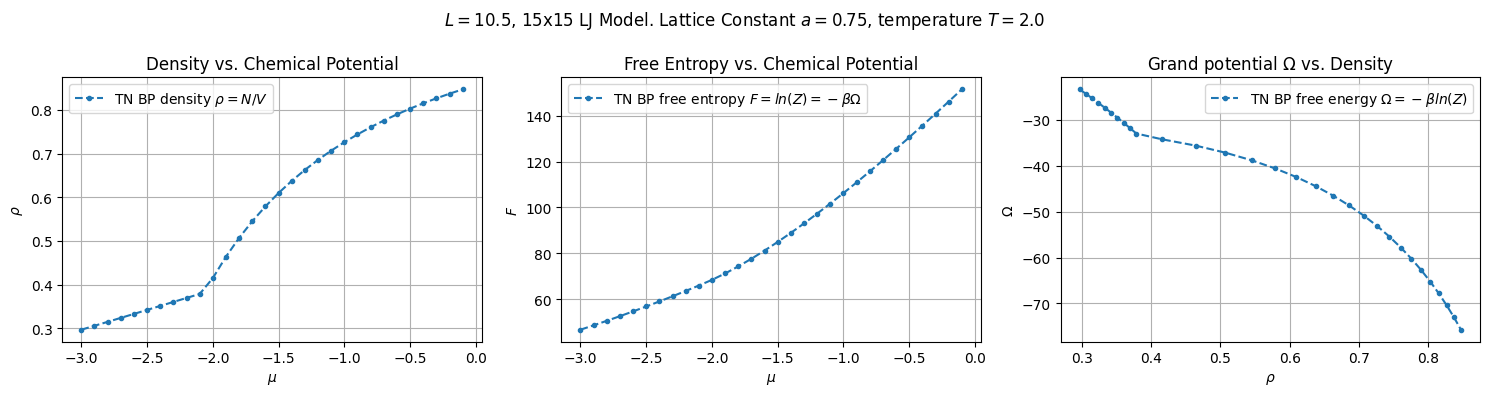

In [425]:
data = """
T=2.0, Entropy = 46.786313394217906, Converged=True, damping=0.3, density N/V=0.29673681131186613, chemical potential=-3.0
T=2.0, Entropy = 48.69244352284813, Converged=True, damping=0.3, density N/V=0.30570444257619556, chemical potential=-2.9
T=2.0, Entropy = 50.65550069344472, Converged=True, damping=0.3, density N/V=0.31472680616512183, chemical potential=-2.8
T=2.0, Entropy = 52.675797881870885, Converged=True, damping=0.3, density N/V=0.3237933658345429, chemical potential=-2.6999999999999997
T=2.0, Entropy = 54.75358170460486, Converged=True, damping=0.3, density N/V=0.33289369680316844, chemical potential=-2.5999999999999996
T=2.0, Entropy = 56.88903333724803, Converged=True, damping=0.3, density N/V=0.34201755253146804, chemical potential=-2.4999999999999996
T=2.0, Entropy = 59.08226986127617, Converged=True, damping=0.3, density N/V=0.3511549335954611, chemical potential=-2.3999999999999995
T=2.0, Entropy = 61.333346044166724, Converged=True, damping=0.3, density N/V=0.36029615806871407, chemical potential=-2.2999999999999994
T=2.0, Entropy = 63.6422566147347, Converged=True, damping=0.3, density N/V=0.36943195041924454, chemical potential=-2.1999999999999993
T=2.0, Entropy = 66.00893925153228, Converged=True, damping=0.3, density N/V=0.37855359196125477, chemical potential=-2.099999999999999
T=2.0, Entropy = 68.48493414903118, Converged=True, damping=0.3, density N/V=0.4149137254002695, chemical potential=-1.9999999999999991
T=2.0, Entropy = 71.26952152256347, Converged=True, damping=0.3, density N/V=0.4639763339353333, chemical potential=-1.899999999999999
T=2.0, Entropy = 74.34436973272618, Converged=True, damping=0.3, density N/V=0.5069260493454111, chemical potential=-1.799999999999999
T=2.0, Entropy = 77.67507944357605, Converged=True, damping=0.3, density N/V=0.5450042182433845, chemical potential=-1.6999999999999988
T=2.0, Entropy = 81.23357869696163, Converged=True, damping=0.3, density N/V=0.5790386625315488, chemical potential=-1.5999999999999988
T=2.0, Entropy = 84.99635125884336, Converged=True, damping=0.3, density N/V=0.6096579458196648, chemical potential=-1.4999999999999987
T=2.0, Entropy = 88.94341686446683, Converged=True, damping=0.3, density N/V=0.6373582611814437, chemical potential=-1.3999999999999986
T=2.0, Entropy = 93.05760998447023, Converged=True, damping=0.3, density N/V=0.6625381855656424, chemical potential=-1.2999999999999985
T=2.0, Entropy = 97.32404030134566, Converged=True, damping=0.3, density N/V=0.6855216032859502, chemical potential=-1.1999999999999984
T=2.0, Entropy = 101.72968039288598, Converged=True, damping=0.3, density N/V=0.7065759396227738, chemical potential=-1.0999999999999983
T=2.0, Entropy = 106.2630461744702, Converged=True, damping=0.3, density N/V=0.7259233467341143, chemical potential=-0.9999999999999982
T=2.0, Entropy = 110.9139461546824, Converged=True, damping=0.3, density N/V=0.7437512922072521, chemical potential=-0.8999999999999981
T=2.0, Entropy = 115.67328236504207, Converged=True, damping=0.3, density N/V=0.7602191033793912, chemical potential=-0.799999999999998
T=2.0, Entropy = 120.53289052684633, Converged=True, damping=0.3, density N/V=0.7754633336639646, chemical potential=-0.699999999999998
T=2.0, Entropy = 125.48541033098665, Converged=True, damping=0.3, density N/V=0.789602115501188, chemical potential=-0.5999999999999979
T=2.0, Entropy = 130.52417906895033, Converged=True, damping=0.3, density N/V=0.8027382608183486, chemical potential=-0.4999999999999978
T=2.0, Entropy = 135.64314355449454, Converged=True, damping=0.3, density N/V=0.8149620231752367, chemical potential=-0.3999999999999977
T=2.0, Entropy = 140.83678651325027, Converged=True, damping=0.3, density N/V=0.826352843984012, chemical potential=-0.2999999999999976
T=2.0, Entropy = 146.10006452655685, Converged=True, damping=0.3, density N/V=0.8369812150196702, chemical potential=-0.1999999999999975
T=2.0, Entropy = 151.42835528952546, Converged=True, damping=0.3, density N/V=0.8469099611740235, chemical potential=-0.09999999999999742"""

plot_mu_rho(data, T0=2.0,a=0.75, N_a=15)


/tmp/ipykernel_32277/4102996566.py:329: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


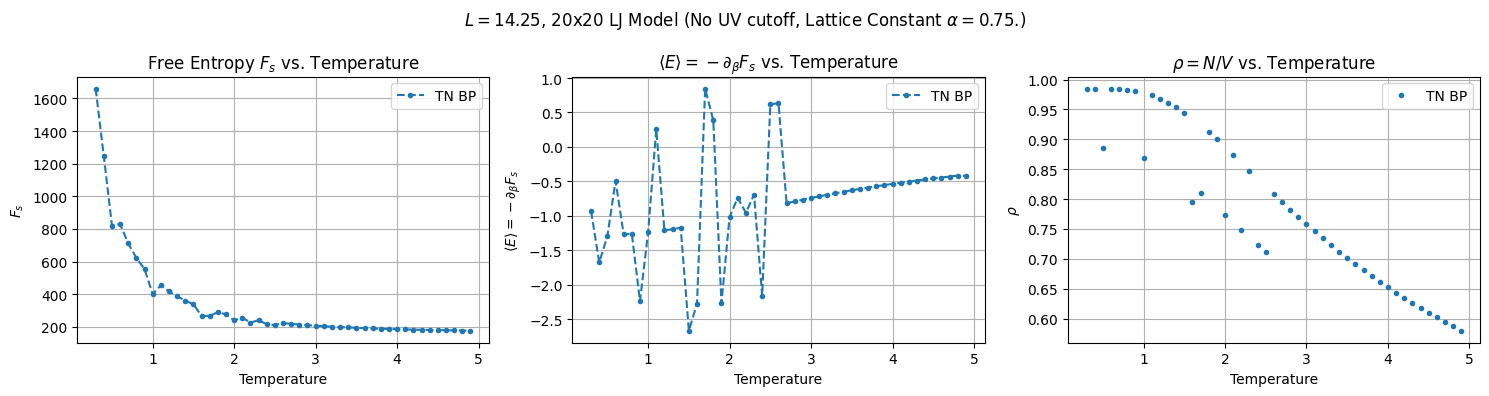

In [23]:
a=0.75
N_a=20
L=a*(N_a-1)
plot_everything_2D_noMC(a, N_a, L, input_sigma=0)

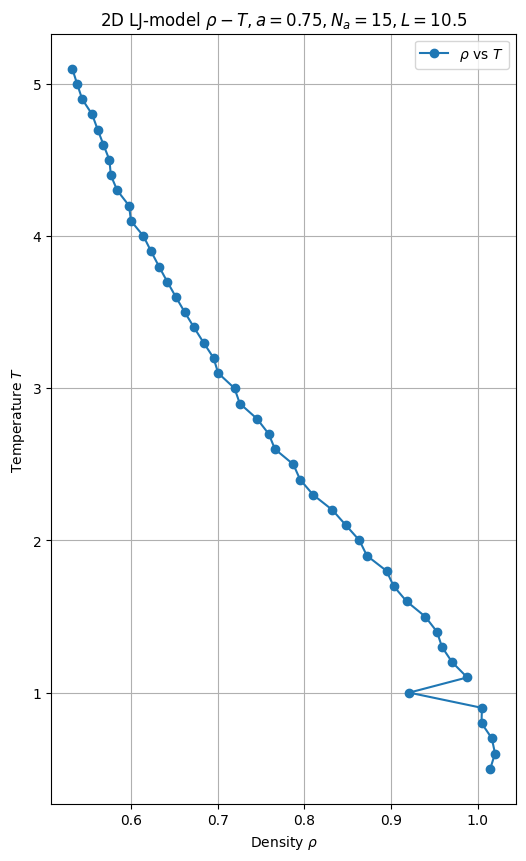

In [401]:
data = """T=0.5, Entropy = 481.8476491833216, Converged=True, damping=0.3, density N/V=1.0145649310923286, chemical potential=0
T=0.6, Entropy = 403.17848757272685, Converged=True, damping=0.3, density N/V=1.0200342883075033, chemical potential=0
T=0.7, Entropy = 346.06743218787796, Converged=True, damping=0.3, density N/V=1.0163404596160317, chemical potential=0
T=0.7999999999999999, Entropy = 302.2986668398057, Converged=True, damping=0.3, density N/V=1.0044432981643738, chemical potential=0
T=0.8999999999999999, Entropy = 270.61734803783594, Converged=True, damping=0.3, density N/V=1.0049268634124697, chemical potential=0
T=0.9999999999999999, Entropy = 217.5253174862377, Converged=False, damping=0.44999999999999996, density N/V=0.9210043948118594, chemical potential=0, Not Converged!
T=1.0999999999999999, Entropy = 223.61890956081112, Converged=True, damping=0.3, density N/V=0.9879363247739277, chemical potential=0
T=1.1999999999999997, Entropy = 205.50882803283758, Converged=True, damping=0.3, density N/V=0.9705665307569378, chemical potential=0
T=1.2999999999999998, Entropy = 191.2837900904581, Converged=True, damping=0.3, density N/V=0.9588170326286555, chemical potential=0
T=1.4, Entropy = 180.15387599803728, Converged=True, damping=0.3, density N/V=0.9530493548133989, chemical potential=0
T=1.4999999999999998, Entropy = 170.02795644348643, Converged=True, damping=0.3, density N/V=0.9394206337898742, chemical potential=0
T=1.5999999999999996, Entropy = 160.70820189928483, Converged=True, damping=0.3, density N/V=0.9179567113810649, chemical potential=0
T=1.6999999999999997, Entropy = 153.3600746452509, Converged=True, damping=0.3, density N/V=0.9030225895768146, chemical potential=0
T=1.7999999999999998, Entropy = 147.64373961089947, Converged=True, damping=0.3, density N/V=0.8948150275680395, chemical potential=0
T=1.8999999999999997, Entropy = 141.55188751007984, Converged=True, damping=0.3, density N/V=0.8721583279468462, chemical potential=0
T=1.9999999999999996, Entropy = 137.33021515263775, Converged=True, damping=0.3, density N/V=0.8635803540471972, chemical potential=0
T=2.0999999999999996, Entropy = 133.13928520427874, Converged=True, damping=0.3, density N/V=0.8479262445934315, chemical potential=0
T=2.1999999999999997, Entropy = 129.46450829629515, Converged=True, damping=0.3, density N/V=0.8323900290114525, chemical potential=0
T=2.3, Entropy = 125.77728675610078, Converged=True, damping=0.3, density N/V=0.8101037499217202, chemical potential=0
T=2.3999999999999995, Entropy = 122.94774843676146, Converged=True, damping=0.3, density N/V=0.7950832430896084, chemical potential=0
T=2.4999999999999996, Entropy = 120.846447986378, Converged=True, damping=0.3, density N/V=0.7872455741842393, chemical potential=0
T=2.5999999999999996, Entropy = 118.21856962227434, Converged=True, damping=0.3, density N/V=0.766050552791627, chemical potential=0
T=2.6999999999999993, Entropy = 116.59789185789924, Converged=True, damping=0.3, density N/V=0.7588644148166274, chemical potential=0
T=2.7999999999999994, Entropy = 114.80973630955522, Converged=True, damping=0.3, density N/V=0.7452749525875838, chemical potential=0
T=2.8999999999999995, Entropy = 112.88743271984366, Converged=True, damping=0.3, density N/V=0.725451092286035, chemical potential=0
T=2.9999999999999996, Entropy = 111.77071505655901, Converged=True, damping=0.3, density N/V=0.7193581489635044, chemical potential=0
T=3.0999999999999996, Entropy = 110.19105158863826, Converged=True, damping=0.3, density N/V=0.7004965165070177, chemical potential=0
T=3.1999999999999993, Entropy = 109.31087338877465, Converged=True, damping=0.3, density N/V=0.6951406792847251, chemical potential=0
T=3.2999999999999994, Entropy = 108.25703410988183, Converged=True, damping=0.3, density N/V=0.6836616843100752, chemical potential=0
T=3.3999999999999995, Entropy = 107.30299649919323, Converged=True, damping=0.3, density N/V=0.6725935225742908, chemical potential=0
T=3.499999999999999, Entropy = 106.43771416001064, Converged=True, damping=0.3, density N/V=0.6619274260363136, chemical potential=0
T=3.599999999999999, Entropy = 105.65155153567277, Converged=True, damping=0.3, density N/V=0.6516535647637384, chemical potential=0
T=3.6999999999999993, Entropy = 104.9360792618933, Converged=True, damping=0.3, density N/V=0.6417614005730472, chemical potential=0
T=3.7999999999999994, Entropy = 104.28390251784259, Converged=True, damping=0.3, density N/V=0.6322399664807998, chemical potential=0
T=3.8999999999999995, Entropy = 103.68851656053734, Converged=True, damping=0.3, density N/V=0.6230780854893979, chemical potential=0
T=3.999999999999999, Entropy = 103.14418473264396, Converged=True, damping=0.3, density N/V=0.6142645408237789, chemical potential=0
T=4.1, Entropy = 102.48833512288076, Converged=True, damping=0.3, density N/V=0.5998814357776552, chemical potential=0
T=4.199999999999999, Entropy = 102.18897269735005, Converged=True, damping=0.3, density N/V=0.5976381504402583, chemical potential=0
T=4.299999999999999, Entropy = 101.6312340733601, Converged=True, damping=0.3, density N/V=0.5840370192234006, chemical potential=0
T=4.399999999999999, Entropy = 101.25474154805086, Converged=True, damping=0.3, density N/V=0.5765790116100933, chemical potential=0
T=4.499999999999999, Entropy = 101.02951431475968, Converged=True, damping=0.3, density N/V=0.5750406078209733, chemical potential=0
T=4.599999999999999, Entropy = 100.70278473744108, Converged=True, damping=0.3, density N/V=0.5680923783985719, chemical potential=0
T=4.699999999999999, Entropy = 100.40144641374016, Converged=True, damping=0.3, density N/V=0.5614206397803461, chemical potential=0
T=4.799999999999999, Entropy = 100.12321897096932, Converged=True, damping=0.3, density N/V=0.5550166242140968, chemical potential=0
T=4.899999999999999, Entropy = 99.77588332893197, Converged=True, damping=0.3, density N/V=0.5435329798244195, chemical potential=0
T=4.999999999999999, Entropy = 99.54483608529254, Converged=True, damping=0.3, density N/V=0.5377077057607516, chemical potential=0
T=5.099999999999999, Entropy = 99.33106273348916, Converged=True, damping=0.3, density N/V=0.5321232559029269, chemical potential=0
"""

plot_T_rho_diagram(data.split('\n'), a=0.75, N_a=15)

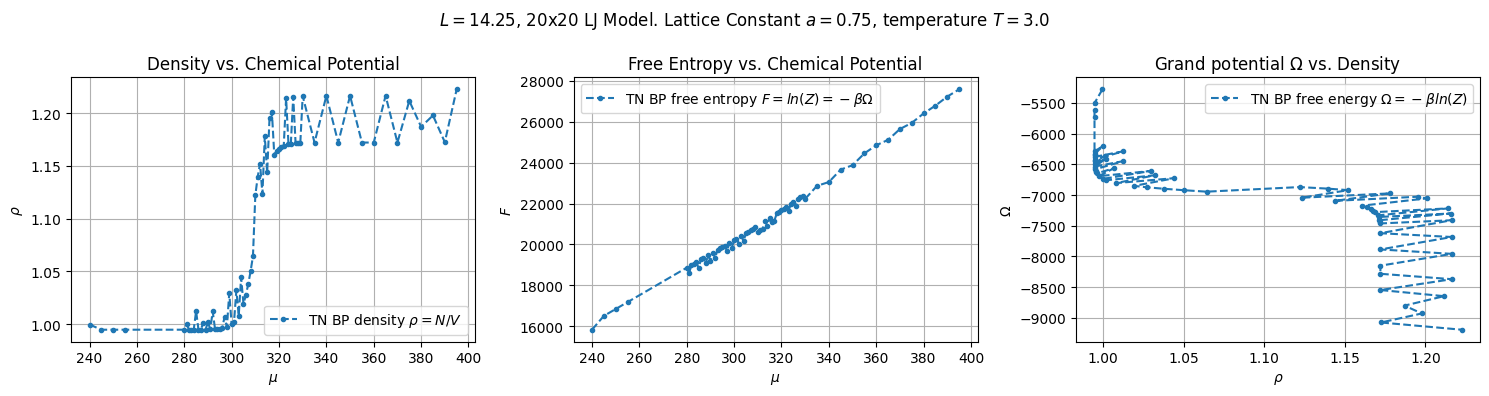

In [14]:
data = """
T=3.0, Entropy = 15833.438773684145, Converged=True, damping=0.4, density N/V=0.9996920517040637, chemical potential=240, N_a=20, a=0.75
T=3.0, Entropy = 16507.116481630448, Converged=True, damping=0.4, density N/V=0.9947675878719097, chemical potential=245, N_a=20, a=0.75
T=3.0, Entropy = 16843.783143025597, Converged=True, damping=0.4, density N/V=0.9947676148770062, chemical potential=250, N_a=20, a=0.75
T=3.0, Entropy = 17180.449808965488, Converged=True, damping=0.4, density N/V=0.9947676212252438, chemical potential=255, N_a=20, a=0.75
T=3.0, Entropy = 18863.784488839545, Converged=True, damping=0.4, density N/V=0.9947742555694545, chemical potential=280
T=3.0, Entropy = 18606.239633400633, Converged=True, damping=0.4, density N/V=0.9999867528352805, chemical potential=281
T=3.0, Entropy = 18998.452432344475, Converged=True, damping=0.4, density N/V=0.9947805432098207, chemical potential=282
T=3.0, Entropy = 19065.78680377397, Converged=True, damping=0.4, density N/V=0.9947856550733485, chemical potential=283
T=3.0, Entropy = 19133.121585851804, Converged=True, damping=0.4, density N/V=0.9947927888754686, chemical potential=284
T=3.0, Entropy = 18863.36594221862, Converged=True, damping=0.4, density N/V=1.0124673415304817, chemical potential=285
T=3.0, Entropy = 19267.793096098136, Converged=True, damping=0.4, density N/V=0.9948166375683537, chemical potential=286
T=3.0, Entropy = 19335.130366636426, Converged=True, damping=0.4, density N/V=0.994836021898175, chemical potential=287
T=3.0, Entropy = 19080.0040377842, Converged=True, damping=0.4, density N/V=1.0012295444888717, chemical potential=288
T=3.0, Entropy = 19469.810195221697, Converged=True, damping=0.4, density N/V=0.9949008106869679, chemical potential=289
T=3.0, Entropy = 19215.442643013455, Converged=True, damping=0.4, density N/V=1.001883650905688, chemical potential=290
T=3.0, Entropy = 19604.502487115536, Converged=True, damping=0.4, density N/V=0.9950268971645339, chemical potential=291
T=3.0, Entropy = 19347.28940064741, Converged=True, damping=0.4, density N/V=1.0122437554523305, chemical potential=292
T=3.0, Entropy = 19739.21902476898, Converged=True, damping=0.4, density N/V=0.9952720847361771, chemical potential=293
T=3.0, Entropy = 19806.59286619863, Converged=True, damping=0.4, density N/V=0.9954710477690213, chemical potential=294
T=3.0, Entropy = 19873.982674535262, Converged=True, damping=0.4, density N/V=0.9957481470800921, chemical potential=295
T=3.0, Entropy = 19941.394920617433, Converged=True, damping=0.4, density N/V=0.996133749715223, chemical potential=296
T=3.0, Entropy = 19690.312560854916, Converged=True, damping=0.4, density N/V=1.0067496876277227, chemical potential=297
T=3.0, Entropy = 20076.32354981873, Converged=True, damping=0.4, density N/V=0.9974135420688336, chemical potential=298
T=3.0, Entropy = 19824.402746766504, Converged=True, damping=0.4, density N/V=1.0295323623027999, chemical potential=299
T=3.0, Entropy = 20211.49664454016, Converged=True, damping=0.4, density N/V=0.9998650795913331, chemical potential=300
T=3.0, Entropy = 20279.237664901928, Converged=True, damping=0.4, density N/V=1.0018188414262468, chemical potential=301
T=3.0, Entropy = 20033.614270115864, Converged=True, damping=0.4, density N/V=1.0320794789213932, chemical potential=302
T=3.0, Entropy = 20415.241483362763, Converged=True, damping=0.4, density N/V=1.0081023283885688, chemical potential=303
T=3.0, Entropy = 20173.19384270158, Converged=True, damping=0.4, density N/V=1.04437096456636, chemical potential=304
T=3.0, Entropy = 20552.402955250174, Converged=True, damping=0.4, density N/V=1.0193129999977386, chemical potential=305
T=3.0, Entropy = 20621.66437363707, Converged=True, damping=0.4, density N/V=1.0275205976704904, chemical potential=306
T=3.0, Entropy = 20691.550044144158, Converged=True, damping=0.4, density N/V=1.0377822331981554, chemical potential=307
T=3.0, Entropy = 20762.201312882888, Converged=True, damping=0.4, density N/V=1.050124042455952, chemical potential=308
T=3.0, Entropy = 20833.75148439961, Converged=True, damping=0.4, density N/V=1.0642660000596142, chemical potential=309
T=3.0, Entropy = 20609.085673298683, Converged=True, damping=0.4, density N/V=1.1219744485589564, chemical potential=310
T=3.0, Entropy = 20685.935663481305, Converged=True, damping=0.4, density N/V=1.1394775797147334, chemical potential=311
T=3.0, Entropy = 20759.713866239825, Converged=True, damping=0.4, density N/V=1.152141910411927, chemical potential=312
T=3.0, Entropy = 21130.12649932684, Converged=True, damping=0.4, density N/V=1.123220672360259, chemical potential=313
T=3.0, Entropy = 20917.481898325048, Converged=True, damping=0.4, density N/V=1.1779343339888804, chemical potential=314
T=3.0, Entropy = 21283.664591724522, Converged=True, damping=0.4, density N/V=1.1437202633252095, chemical potential=315
T=3.0, Entropy = 21080.725023048282, Converged=False, damping=0.4, density N/V=1.195317374610198, chemical potential=316, Not Converged!
T=3.0, Entropy = 21161.77455131009, Converged=True, damping=0.4, density N/V=1.2008770764162684, chemical potential=317
T=3.0, Entropy = 21517.86759290422, Converged=True, damping=0.4, density N/V=1.1606923607379933, chemical potential=318
T=3.0, Entropy = 21596.54223232445, Converged=True, damping=0.4, density N/V=1.1637939391289598, chemical potential=319
T=3.0, Entropy = 21675.39767636869, Converged=True, damping=0.4, density N/V=1.1660731281970773, chemical potential=320, N_a=20, a=0.75
T=3.0, Entropy = 21754.385509983666, Converged=True, damping=0.4, density N/V=1.1677360352632995, chemical potential=321, N_a=20, a=0.75
T=3.0, Entropy = 21833.46968603799, Converged=True, damping=0.4, density N/V=1.1689430874577154, chemical potential=322, N_a=20, a=0.75
T=3.0, Entropy = 21650.351073460708, Converged=True, damping=0.4, density N/V=1.2141049016291343, chemical potential=323, N_a=20, a=0.75
T=3.0, Entropy = 21991.828060316362, Converged=True, damping=0.4, density N/V=1.1704456938606802, chemical potential=324, N_a=20, a=0.75
T=3.0, Entropy = 22071.06878596946, Converged=True, damping=0.4, density N/V=1.1708990153456953, chemical potential=325, N_a=20, a=0.75
T=3.0, Entropy = 21900.85834460556, Converged=True, damping=0.4, density N/V=1.2155514292911842, chemical potential=326, N_a=20, a=0.75
T=3.0, Entropy = 22229.62129843895, Converged=True, damping=0.4, density N/V=1.1714590500155828, chemical potential=327, N_a=20, a=0.75
T=3.0, Entropy = 22308.920433686086, Converged=True, damping=0.4, density N/V=1.1716270887778357, chemical potential=328, N_a=20, a=0.75
T=3.0, Entropy = 22388.229247865867, Converged=True, damping=0.4, density N/V=1.1717476446706419, chemical potential=329, N_a=20, a=0.75
T=3.0, Entropy = 22230.074549540277, Converged=True, damping=0.4, density N/V=1.2161567885983378, chemical potential=330, N_a=20, a=0.75
T=3.0, Entropy = 22864.175613316518, Converged=True, damping=0.4, density N/V=1.172011575025251, chemical potential=335, N_a=20, a=0.75
T=3.0, Entropy = 23049.52144075815, Converged=True, damping=0.4, density N/V=1.2163663635019795, chemical potential=340, N_a=20, a=0.75
T=3.0, Entropy = 23657.50084607597, Converged=True, damping=0.4, density N/V=1.1720514635866233, chemical potential=345, N_a=20, a=0.75
T=3.0, Entropy = 23872.85377352559, Converged=True, damping=0.4, density N/V=1.2163740489787935, chemical potential=350, N_a=20, a=0.75
T=3.0, Entropy = 24450.833890988568, Converged=True, damping=0.4, density N/V=1.1720528896962612, chemical potential=355, N_a=20, a=0.75
T=3.0, Entropy = 24847.500551718098, Converged=True, damping=0.4, density N/V=1.1720529452076445, chemical potential=360, N_a=20, a=0.75
T=3.0, Entropy = 25111.18486377508, Converged=True, damping=0.4, density N/V=1.2163823861957892, chemical potential=365, N_a=20, a=0.75
T=3.0, Entropy = 25640.833969611518, Converged=True, damping=0.4, density N/V=1.1720533814943095, chemical potential=370, N_a=20, a=0.75
T=3.0, Entropy = 25941.01569078073, Converged=True, damping=0.4, density N/V=1.2115651917513026, chemical potential=375, N_a=20, a=0.75
T=3.0, Entropy = 26402.43694424412, Converged=True, damping=0.4, density N/V=1.1870020648892203, chemical potential=380, N_a=20, a=0.75
T=3.0, Entropy = 26786.0783547409, Converged=True, damping=0.4, density N/V=1.1977223235261343, chemical potential=385, N_a=20, a=0.75
T=3.0, Entropy = 27227.571159709118, Converged=True, damping=0.4, density N/V=1.172400692892355, chemical potential=390, N_a=20, a=0.75
T=3.0, Entropy = 27580.00070890175, Converged=True, damping=0.4, density N/V=1.2224351619005187, chemical potential=395, N_a=20, a=0.75
"""

plot_mu_rho(data, T0=3.0,a=0.75, N_a=20)

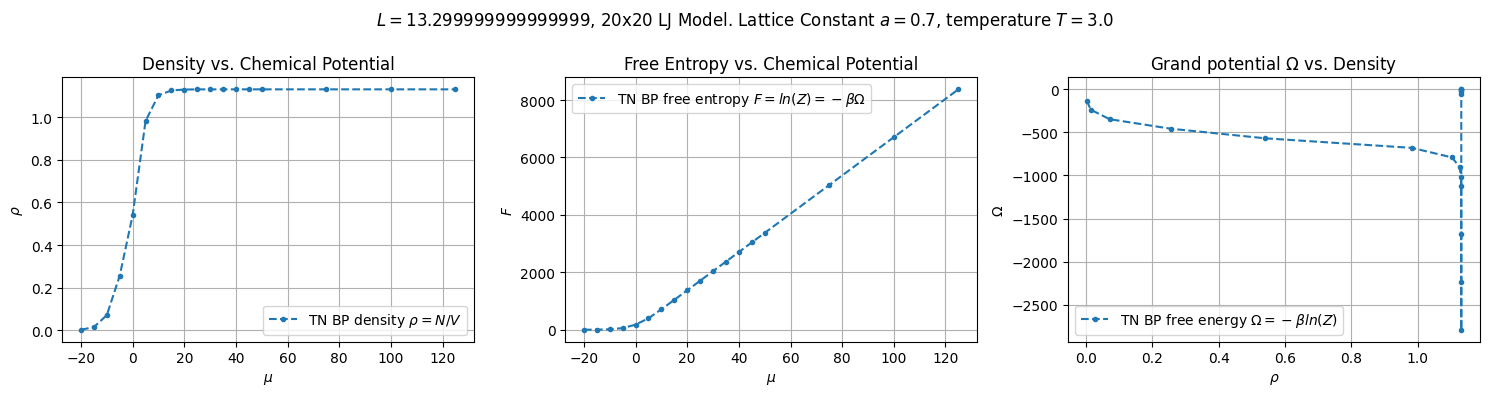

In [19]:
data = """
T=3.0, Entropy = 398.44204376936545, Converged=True, damping=0.5, density N/V=0.9821609364843003, chemical potential=5, N_a=20, a=0.7
T=3.0, Entropy = 710.654379454148, Converged=True, damping=0.5, density N/V=1.102948535196677, chemical potential=10, N_a=20, a=0.7
T=3.0, Entropy = 1040.0113544648402, Converged=True, damping=0.5, density N/V=1.1254073580514778, chemical potential=15, N_a=20, a=0.7
T=3.0, Entropy = 1372.5928624780406, Converged=True, damping=0.5, density N/V=1.1296562437154316, chemical potential=20, N_a=20, a=0.7
T=3.0, Entropy = 1705.7841558429661, Converged=True, damping=0.5, density N/V=1.130459175567009, chemical potential=25, N_a=20, a=0.7
T=3.0, Entropy = 2039.0906598442093, Converged=True, damping=0.5, density N/V=1.130610846066832, chemical potential=30, N_a=20, a=0.7
T=3.0, Entropy = 2372.4189257212597, Converged=True, damping=0.5, density N/V=1.1306394935119881, chemical potential=35, N_a=20, a=0.7
T=3.0, Entropy = 2705.751301933506, Converged=True, damping=0.5, density N/V=1.1306449043362374, chemical potential=40, N_a=20, a=0.7
T=3.0, Entropy = 3039.084454490257, Converged=True, damping=0.5, density N/V=1.130645926309695, chemical potential=45, N_a=20, a=0.7
T=3.0, Entropy = 3372.4177536789325, Converged=True, damping=0.5, density N/V=1.130646119335574, chemical potential=50, N_a=20, a=0.7
T=3.0, Entropy = 5039.084412395925, Converged=True, damping=0.5, density N/V=1.1306461642721053, chemical potential=75, N_a=20, a=0.7
T=3.0, Entropy = 6705.7510790618935, Converged=True, damping=0.5, density N/V=1.1306461642828873, chemical potential=100, N_a=20, a=0.7
T=3.0, Entropy = 8372.417745726134, Converged=True, damping=0.5, density N/V=1.130646164282888, chemical potential=125, N_a=20, a=0.7
T=3.0, Entropy = 0.5078755262879877, Converged=True, damping=0.5, density N/V=0.002864498969992668, chemical potential=-20, N_a=20, a=0.7
T=3.0, Entropy = 2.662599942149744, Converged=True, damping=0.5, density N/V=0.014871154665399766, chemical potential=-15, N_a=20, a=0.7
T=3.0, Entropy = 13.416683993477657, Converged=True, damping=0.5, density N/V=0.07141742275449972, chemical potential=-10, N_a=20, a=0.7
T=3.0, Entropy = 57.719911429068304, Converged=True, damping=0.5, density N/V=0.25636392950719233, chemical potential=-5, N_a=20, a=0.7
T=3.0, Entropy = 175.04825620248394, Converged=True, damping=0.5, density N/V=0.5405490068307724, chemical potential=0, N_a=20, a=0.7

"""

plot_mu_rho(data, T0=3.0,a=0.7, N_a=20)

/tmp/ipykernel_9101/2305473659.py:47: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


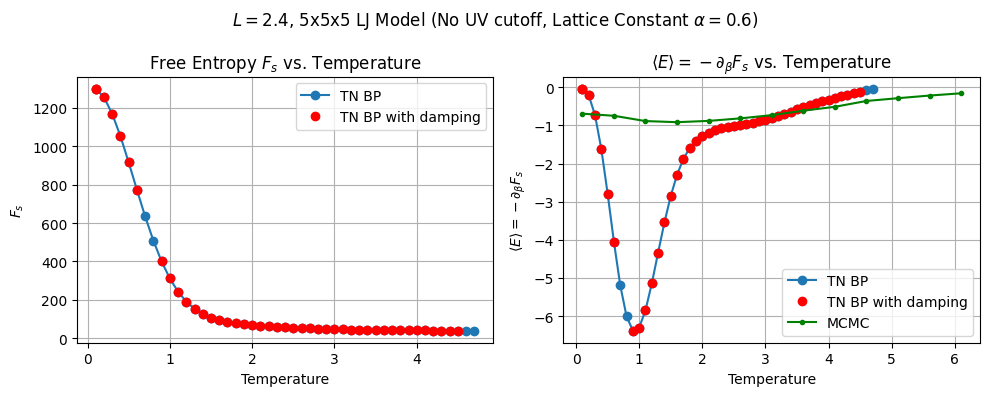

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

a=0.6
N_a=5
L=a*(N_a-1)


# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []
damping = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        damping.append(float(line.split(',')[3].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
# Sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP)
T_tn_BP = T_tn_BP[idx]
Entropy_BP = Entropy_BP[idx]
sigma = 5
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[0].plot(T_tn_BP[i], Entropy_BP[i], 'ro')
# label the red point only once
ax[0].plot(T_tn_BP[0], Entropy_BP[0], 'ro', label='TN BP with damping')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_BP, numerical_E_BP, 'o-', label='TN BP')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[1].plot(T_tn_BP[i], numerical_E_BP[i], 'ro')
# label the red point only once
ax[1].plot(T_tn_BP[0], numerical_E_BP[0], 'ro', label='TN BP with damping')

ax[1].plot(T, E, '.-', label='MCMC',color='g')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9101/3973319955.py:41: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_9101/3973319955.py:75: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)


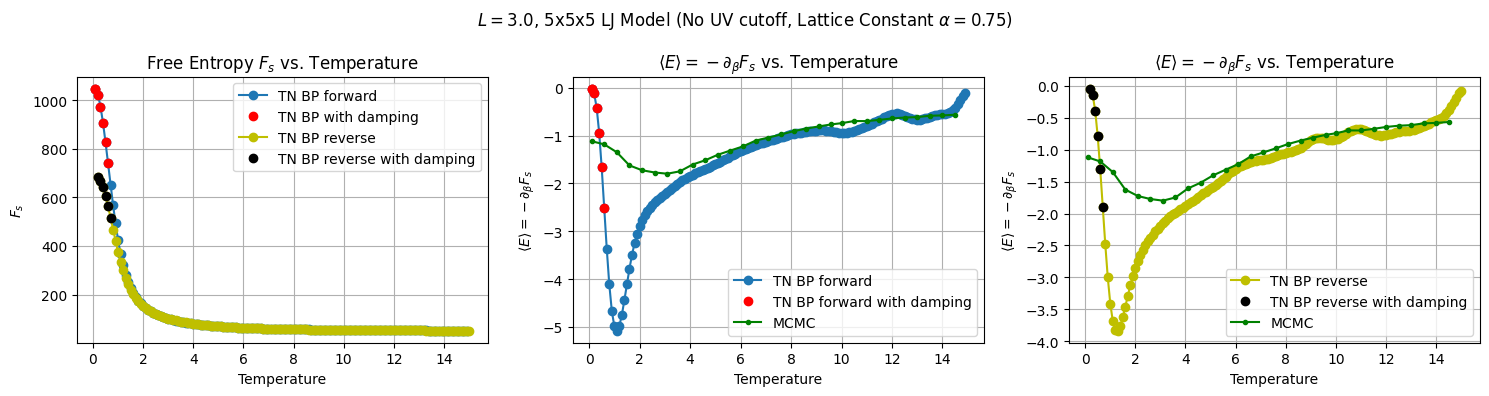

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d
from matplotlib.lines import Line2D

a=0.75
N_a=5
L=a*(N_a-1)


# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()
# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []
damping = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        damping.append(float(line.split(',')[3].split('=')[1]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
# Sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP)
T_tn_BP = T_tn_BP[idx]
Entropy_BP = Entropy_BP[idx]
sigma = 5
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3



# TN BP reverse

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results_reverse.txt", "r")
lines = f.readlines()
f.close()
# Extract data
T_tn_BP_reverse = []
T_tn_BP_not_converged_reverse = []
Entropy_BP_reverse = []
Entropy_BP_not_converged_reverse = []
damping_reverse = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP_reverse.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP_reverse.append(float(line.split(',')[0].split('=')[1]))
        damping_reverse.append(float(line.split(',')[3].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP_reverse = np.array(T_tn_BP_reverse)
Entropy_BP_reverse = np.array(Entropy_BP_reverse)
# Sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP_reverse)
T_tn_BP_reverse = T_tn_BP_reverse[idx]
Entropy_BP_reverse = Entropy_BP_reverse[idx]
damping_reverse = np.array(damping_reverse)[idx]
Entropy_BP_reverse = gaussian_filter1d(Entropy_BP_reverse, sigma)
dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)
T_sq = T_tn_BP_reverse**2
numerical_E_BP_reverse = T_sq * dSdT / N_a**3




# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP forward')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[0].plot(T_tn_BP[i], Entropy_BP[i], 'ro')
# label the red point only once
ax[0].plot(T_tn_BP[0], Entropy_BP[0], 'ro', label='TN BP with damping')

ax[0].plot(T_tn_BP_reverse, Entropy_BP_reverse, 'o-', label='TN BP reverse',color='y')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping_reverse)):
    if damping_reverse[i] > 0:
        if i == 0:
            ax[0].plot(T_tn_BP_reverse[i], Entropy_BP_reverse[i], 'ko', label='TN BP reverse with damping')
        else:
            ax[0].plot(T_tn_BP_reverse[i], Entropy_BP_reverse[i], 'ko')

ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_BP, numerical_E_BP, 'o-', label='TN BP forward')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[1].plot(T_tn_BP[i], numerical_E_BP[i], 'ro')
# label the red point only once
ax[1].plot(T_tn_BP[0], numerical_E_BP[0], 'ro', label='TN BP forward with damping')

ax[2].plot(T_tn_BP_reverse, numerical_E_BP_reverse, 'o-', label='TN BP reverse',color='y')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping_reverse)):
    if damping_reverse[i] > 0:
        if i == 0:
            ax[2].plot(T_tn_BP_reverse[i], numerical_E_BP_reverse[i], 'ko', label='TN BP reverse with damping')
        else:
            ax[2].plot(T_tn_BP_reverse[i], numerical_E_BP_reverse[i], 'ko')
# label the points, but not ploting a new point
ax[2].plot(T, E, '.-', label='MCMC',color='g')
ax[2].set_xlabel('Temperature')
ax[2].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[2].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[2].legend()


ax[1].plot(T, E, '.-', label='MCMC',color='g')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()



ax[0].grid()
ax[1].grid()
ax[2].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9101/3368906451.py:41: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_9101/3368906451.py:75: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)


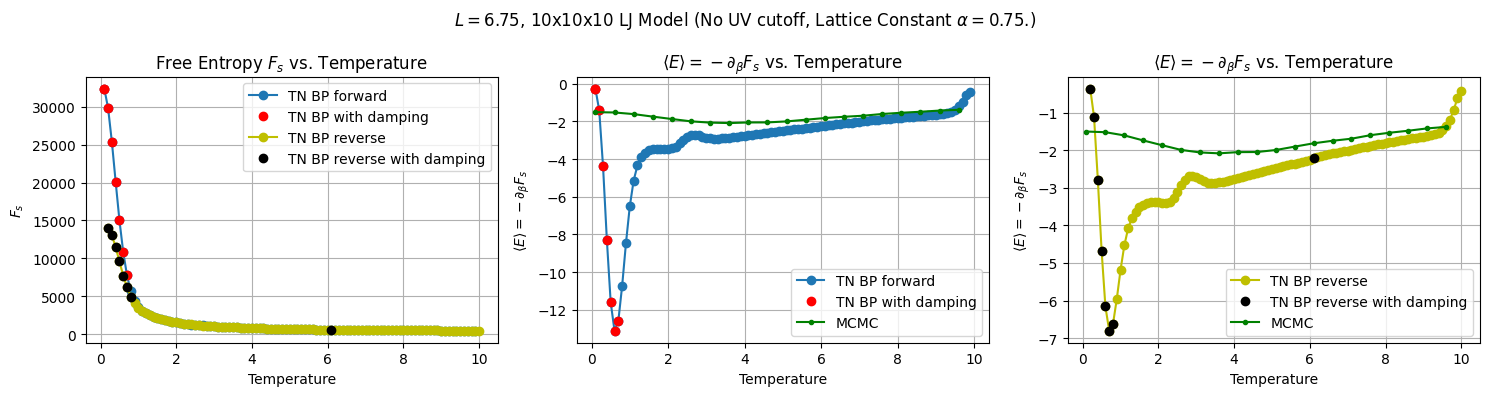

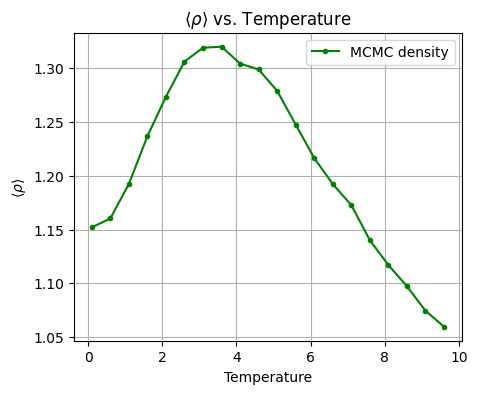

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d
from matplotlib.lines import Line2D

a=0.75
N_a=10
L=a*(N_a-1)


# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()
# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []
damping = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        damping.append(float(line.split(',')[3].split('=')[1]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
# Sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP)
T_tn_BP = T_tn_BP[idx]
Entropy_BP = Entropy_BP[idx]
sigma = 3
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3



# TN BP reverse

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results_reverse.txt", "r")
lines = f.readlines()
f.close()
# Extract data
T_tn_BP_reverse = []
T_tn_BP_not_converged_reverse = []
Entropy_BP_reverse = []
Entropy_BP_not_converged_reverse = []
damping_reverse = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP_reverse.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP_reverse.append(float(line.split(',')[0].split('=')[1]))
        damping_reverse.append(float(line.split(',')[3].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP_reverse = np.array(T_tn_BP_reverse)
Entropy_BP_reverse = np.array(Entropy_BP_reverse)
# Sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP_reverse)
T_tn_BP_reverse = T_tn_BP_reverse[idx]
Entropy_BP_reverse = Entropy_BP_reverse[idx]
damping_reverse = np.array(damping_reverse)[idx]
Entropy_BP_reverse = gaussian_filter1d(Entropy_BP_reverse, sigma)
dSdT = scipy.gradient(Entropy_BP_reverse, T_tn_BP_reverse)
T_sq = T_tn_BP_reverse**2
numerical_E_BP_reverse = T_sq * dSdT / N_a**3




# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Occupation':
        M.append(float(line.split(' ')[-1])*(N_a**3/L**3))



# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP forward')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[0].plot(T_tn_BP[i], Entropy_BP[i], 'ro')
# label the red point only once
ax[0].plot(T_tn_BP[0], Entropy_BP[0], 'ro', label='TN BP with damping')

ax[0].plot(T_tn_BP_reverse, Entropy_BP_reverse, 'o-', label='TN BP reverse',color='y')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping_reverse)):
    if damping_reverse[i] > 0:
        if i == 0:
            ax[0].plot(T_tn_BP_reverse[i], Entropy_BP_reverse[i], 'ko', label='TN BP reverse with damping')
        else:
            ax[0].plot(T_tn_BP_reverse[i], Entropy_BP_reverse[i], 'ko')

ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_BP, numerical_E_BP, 'o-', label='TN BP forward')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping)):
    if damping[i] > 0:
        ax[1].plot(T_tn_BP[i], numerical_E_BP[i], 'ro')
# label the red point only once
ax[1].plot(T_tn_BP[0], numerical_E_BP[0], 'ro', label='TN BP with damping')

ax[2].plot(T_tn_BP_reverse, numerical_E_BP_reverse, 'o-', label='TN BP reverse',color='y')
# if corresponding damping is greater than 0, make the point red
for i in range(len(damping_reverse)):
    if damping_reverse[i] > 0:
        if i == 0:
            ax[2].plot(T_tn_BP_reverse[i], numerical_E_BP_reverse[i], 'ko', label='TN BP reverse with damping')
        else:
            ax[2].plot(T_tn_BP_reverse[i], numerical_E_BP_reverse[i], 'ko')
# label the points, but not ploting a new point
ax[2].plot(T, E, '.-', label='MCMC',color='g')
ax[2].set_xlabel('Temperature')
ax[2].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[2].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[2].legend()


ax[1].plot(T, E, '.-', label='MCMC',color='g')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[2].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()

# show density in MC result
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(T, M, '.-', label='MCMC density',color='g')
ax.set_xlabel('Temperature')
ax.set_ylabel(r'$\langle \rho\rangle$')
ax.set_title(r'$\langle \rho\rangle$ vs. Temperature')
ax.legend()
ax.grid()
plt.show()


/tmp/ipykernel_9101/1495934248.py:39: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
/tmp/ipykernel_9101/1495934248.py:87: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_e, T_tn_e)


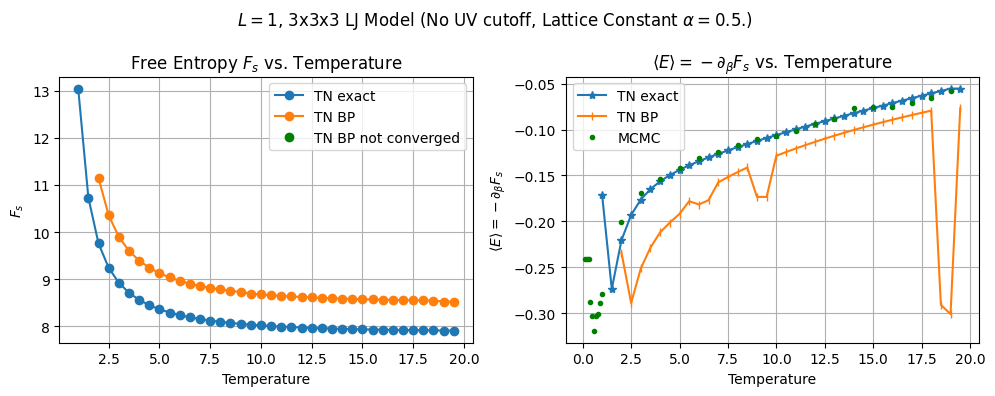

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

L=1
N_a=3

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
sigma = 0.1
Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={L}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Total':
        M.append(float(line.split(' ')[-1]))



# TN Exact

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_Exact_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_e = []
Entropy_e = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_e.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_e.append(float(line.split(',')[0].split('=')[1]))

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_e = np.array(T_tn_e)
Entropy_e = np.array(Entropy_e)
dSdT = scipy.gradient(Entropy_e, T_tn_e)
T_sq = T_tn_e**2
numerical_E_e = T_sq * dSdT / N_a**3





# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].plot(T_tn_BP_not_converged, Entropy_BP_not_converged, 'o', color ='g',label='TN BP not converged')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')

ax[1].plot(T, E, '.', label='MCMC',color='g')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_9101/2814130996.py:43: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


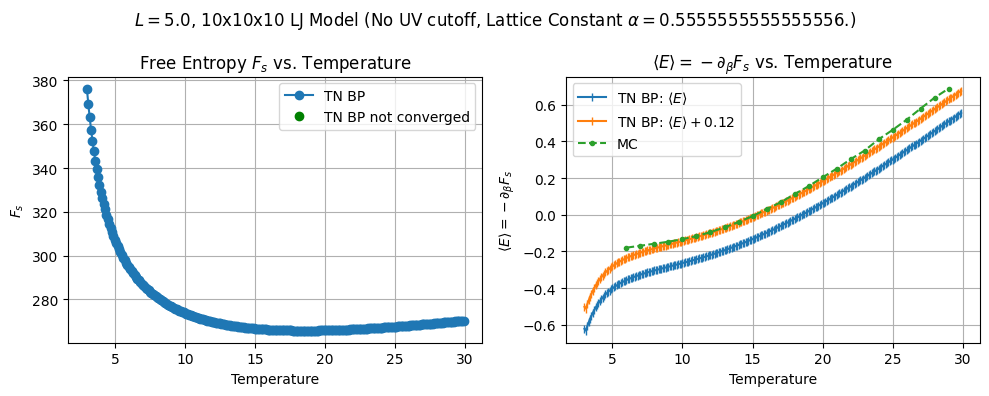

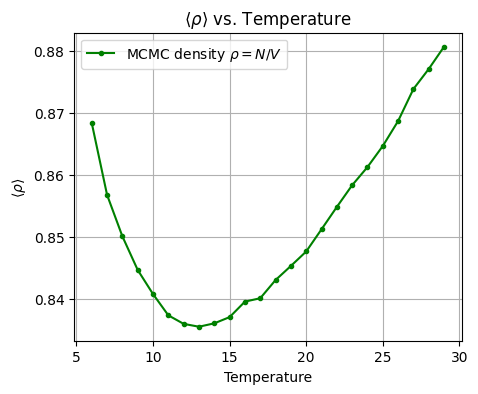

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

L=5.0
N_a=10

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
# sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP)
T_tn_BP = T_tn_BP[idx]
Entropy_BP = Entropy_BP[idx]
# sigma = 1
# Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3 
shift = 0.12
numerical_E_BP_shifted = T_sq * dSdT / N_a**3 + shift*np.ones(len(T_tn_BP))


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={5}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Occupation':
        M.append(float(line.split(' ')[-1])*N_a**3/L**3)

# sort the data to make sure T is increasing
idx = np.argsort(T)
T = np.array(T)[idx]
E = np.array(E)[idx]
M = np.array(M)[idx]




# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].plot(T_tn_BP_not_converged, Entropy_BP_not_converged, 'o', color ='g',label='TN BP not converged')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label=r'TN BP: $\langle E \rangle$')
ax[1].plot(T_tn_BP, numerical_E_BP_shifted, '|-', label=r'TN BP: $\langle E \rangle + {}$'.format(shift))
for i in range(len(T_tn_BP_not_converged)):
    temp = T_tn_BP_not_converged[i]
    idx = np.where(T_tn_BP == temp)[0][0]
    if i == 0:
        ax[1].plot(temp, numerical_E_BP[idx], 'o', color='g', label='TN BP not converged')
    else:
        ax[1].plot(temp, numerical_E_BP[idx], 'o', color='g')

# ax[1].plot(T_spin, E_spin, '.-', label='MCMC spin basis',color='g')
ax[1].plot(T, E, '.--', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()

# show density in MC result
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(T, M, '.-', label=r'MCMC density $\rho = N/V$',color='g')
ax.set_xlabel('Temperature')
ax.set_ylabel(r'$\langle \rho\rangle$')
ax.set_title(r'$\langle \rho\rangle$ vs. Temperature')
ax.legend()
ax.grid()
plt.show()



/tmp/ipykernel_9101/3686703875.py:43: DeprecationWarning: scipy.gradient is deprecated and will be removed in SciPy 2.0.0, use numpy.gradient instead
  dSdT = scipy.gradient(Entropy_BP, T_tn_BP)


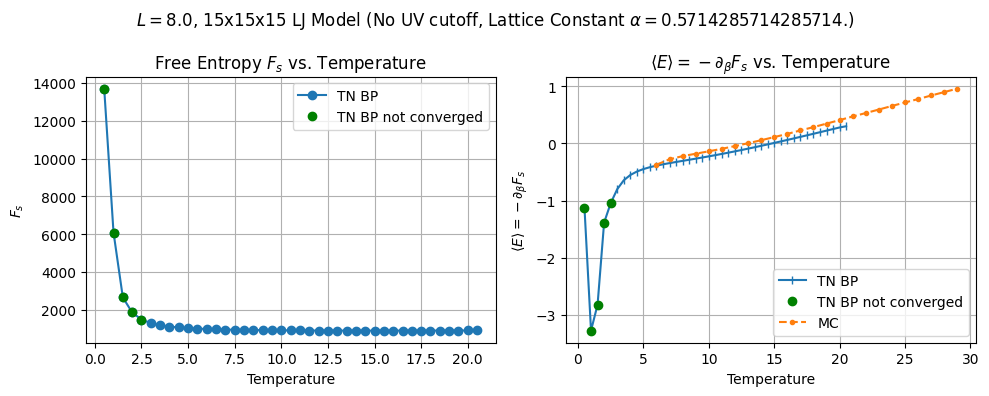

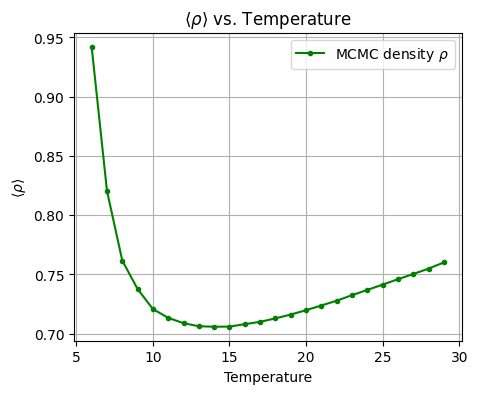

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d

L=8.0
N_a=15

# TN BP

# Read from file
f = open(f"./3DLJ_occ_L={L}_N_a={N_a}_BP_results_reverse.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T_tn_BP = []
T_tn_BP_not_converged = []
Entropy_BP = []
Entropy_BP_not_converged = []

for line in lines:
    if line.split(',')[1].split('=')[0] == ' Entropy ':
        Entropy_BP.append(float(line.split(',')[1].split('=')[1].split('\n')[0]))
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
    else:
        T_tn_BP.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        T_tn_BP_not_converged.append(float(line.split(',')[0].split('=')[1]))
        Entropy_BP_not_converged.append(float(line.split(',')[2].split('=')[1].split('\n')[0]))
        

# Compute the numerical derivative of the entropy with respect to temperature
T_tn_BP = np.array(T_tn_BP)
Entropy_BP = np.array(Entropy_BP)
# sort the data to make sure T is increasing
idx = np.argsort(T_tn_BP)
T_tn_BP = T_tn_BP[idx]
Entropy_BP = Entropy_BP[idx]
# sigma = 1
# Entropy_BP = gaussian_filter1d(Entropy_BP, sigma)
dSdT = scipy.gradient(Entropy_BP, T_tn_BP)
T_sq = T_tn_BP**2
numerical_E_BP = T_sq * dSdT / N_a**3


# MC

# Read from file
f = open(f"./MC/3DLJ_occ_L={8}_N_a={N_a}_results.txt", "r")
lines = f.readlines()
f.close()


# Extract data
T = []
E = []
M = []

for line in lines:
    if line.split('=')[0] == 'T':
        T.append(float(line.split('=')[1]))
    elif line.split(' ')[0] == 'Energy':
        E.append(float(line.split(' ')[-1]))
    elif line.split(' ')[0] == 'Occupation':
        M.append(float(line.split(' ')[-1])*N_a**3/L**3)

# sort the data to make sure T is increasing
idx = np.argsort(T)
T = np.array(T)[idx]
E = np.array(E)[idx]
M = np.array(M)[idx]




# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# ax[0].plot(T_tn_e, Entropy_e, 'o-', label='TN exact')
ax[0].plot(T_tn_BP, Entropy_BP, 'o-', label='TN BP')
ax[0].plot(T_tn_BP_not_converged, Entropy_BP_not_converged, 'o', color ='g',label='TN BP not converged')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel(r'$F_s$')
ax[0].set_title(r'Free Entropy $F_s$ vs. Temperature')
ax[0].legend()

# ax[1].plot(T_tn_e, numerical_E_e, '*-', label='TN exact')
ax[1].plot(T_tn_BP, numerical_E_BP, '|-', label='TN BP')
# get the temperature where BP is not converged, and paint the corresponding numerical_E_BP points green
for i in range(len(T_tn_BP_not_converged)):
    temp = T_tn_BP_not_converged[i]
    idx = np.where(T_tn_BP == temp)[0][0]
    if i == 0:
        ax[1].plot(temp, numerical_E_BP[idx], 'o', color='g', label='TN BP not converged')
    else:
        ax[1].plot(temp, numerical_E_BP[idx], 'o', color='g')


ax[1].plot(T, E, '.--', label='MC')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel(r'$\langle E\rangle = -\partial_\beta F_s$')
ax[1].set_title(r'$\langle E\rangle = -\partial_\beta F_s$ vs. Temperature')
ax[1].legend()

ax[0].grid()
ax[1].grid()

# Add title
fig.suptitle(rf'$L={L}$, {N_a}x{N_a}x{N_a} LJ Model (No UV cutoff, Lattice Constant $\alpha={L/(N_a-1)}$.)')

plt.tight_layout()
plt.show()

# show density in MC result
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(T, M, '.-', label=r'MCMC density $\rho$',color='g')
ax.set_xlabel('Temperature')
ax.set_ylabel(r'$\langle \rho\rangle$')
ax.set_title(r'$\langle \rho\rangle$ vs. Temperature')
ax.legend()
ax.grid()
plt.show()

